<div id="container" style="position:relative;">
<div style="float:left"><h1> Model Optimization and Interpretation </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

**Author**: Elliot Carter<br>
**Date Created**: August 29, 2023<br>
**Contact**: elliot.carter@gmail.com<br>
---

### Table of Contents

[Introduction](#introduction)

[Data Dictionary](#dd)

[Part 1 - Supervised Modelling and Optimization](#part1)

- [1.1 - Regression](#1.1)

    - [1.1.1 - Linear Regression](#1.1.1)
    - [1.1.2 - Gradient Boosting Regressor](#1.1.2)

- [1.2 - Classification](#1.2)

    - [1.2.1 - Logistic Regression](#1.2.1)
    - [1.2.2 - Gradient Boosting Classifier](#1.2.2)
    
[Part 2 - Model Agnostic Interpretation](#part2)

- [2.1 - Shapley Values](#2.1)
- [2.2 - LIME](#2.2)
    
[Part 3 - Conclusions](#part3)


<a id = "introduction"> </a>
## Introduction

This notebook contains the third and final stage of my project for the BrainStation data science bootcamp, titled "Modelling and Understanding Conspiracy Belief."

#### Introduction to the project
My project is aimed at using the tools of data science to better understand the phenomenon of conspiracy theory belief. The dataset I am working with comes from a 2022 paper by Roland Imhoff and 39 coauthors at various European universities (Imhoff et al 2022). The paper reports the results of two surveys studying the relationship between political orientation and susceptibility to conspiracy belief, with respondents from 26 European countries. The datasets include two measures of  political orientation: self-reported location on a left-right political spectrum and reported voting behaviour in the previous election. Susceptibility to conspiracy belief is measured via responses to a standard questionnaire (the 'Conspiracy Mentality Questionnaire,' or 'CMQ') (originating in Bruder et al 2013). The datasets also include personal-level demographic information (age, sex, country, etc.) as well as some country-level information about political and economic climate.

#### What's in this notebook
In the previous notebook ('EDA and Baseline Modelling'), I combined the datasets, dealt with null and missing values, added certain country-level features to the dataset, and performed some exploratory data analysis and baseline modelling. In this notebook, I use the previous baseline modelling results to guide the process of optimizing the models, and I explore options for interpreting the models using some model-agnostic interpretive tools (SHAP and LIME). I am working with the final, cleaned version of the data here. In the final section, I summarize the results of the models, recording the parameters and scores for the best models. I also draw some conclusions about what we can learn from comparing the models' performance as well as from the results of the model-agnostic interpretive tools.

#### A note about the Conspiracy Mentality Questionnaire (CMQ)

It will be helpful to begin with some description of the CMQ, which will be important for understanding the target variables we will be interested in. The CMQ consists of five statements for which respondents are asked to rate their level of confidence (from 0% for 'certainly not' to 100% for 'certain', in increments of 10%). The statements are as follows:

1. *I think that many very important things happen in the world, which the public is never informed about.*
2. *I think that politicians usually do not tell us the true motives for their decisions.*
3. *I think that government agencies closely monitor all citizens.*
4. *I think that events which superficially seem to lack a connection are often the result of secret activities.*
5. *I think that there are secret organizations that greatly influence political decisions.*

It should be emphasized that agreement with these statements does not necessarily indicate *irrationality* on the part of the respondent. The average CMQ score across the dataset is about 5.8, indicating that on average, respondents lean towards agreeing with these statements. I think the best way of interpreting the CMQ scores is as reflecting a kind of generalized distrust for institutions and authorities. This attitude could very well be justified in many contexts, and so it would be a mistake, in my opinion, to interpret the CMQ score as a representation of conspiracy-related irrationality. It is nonetheless well worth studying this feature, since the kinds of social cooperation required to deal with large-scale political, economic, environmental, and public health crises require that we understand the sources of this kind of distrust. However, I believe that it is a mistake to assume that responsibility for building up the requisite trust for collective projects will always or even usually fall to the individuals high in conspiracy mentality rather than to, e.g., the institutions that have perhaps failed to prove themselves trustworthy.

#### References

- Imhoff, R., Zimmer, F., Klein, O. et al. (2022) Conspiracy mentality and political orientation across 26 countries. Nat Hum Behav 6, 392–403. https://doi.org/10.1038/s41562-021-01258-7
- Bruder, M., Haffke, P., Neave N., Nouripanah, N. and Imhoff, R. (2013) Measuring individual differences in generic beliefs in conspiracy theories across cultures: Conspiracy Mentality Questionnaire. Front. Psychol. 4: 225. https://doi.org/10.3389/fpsyg.2013.00225

<a id = "dd"></a>
## Data Dictionary

The dataset used in this notebook is the final, cleaned version of the dataset created in the previous notebook ('EDA and Baseline Modelling'). The following is the full data dictionary for this dataset.

| **Column**                           | **Description**                                                                                                                                                                                                                                                                                                                                     |
|:--------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `Country`                            | Country of respondent                                                                                                                                                                                                                                                                                                                              |
| `Age`                                | Age of respondent                                                                                                                                                                                                                                                                                                                                  |
| `Sex`                                | Sex of respondent                                                                                                                                                                                                                                                                                                                                  |
| `Edu_high`                           | Binary category; 1 means the respondent has a university degree                                                                                                                                                                                                                                                                                    |
| `Edu_low`                            | Binary category; 1 means the respondent did not finish high school                                                                                                                                                                                                                                                                                 |
| `Pol_Ori`                            | Respondent's self-rating of political orientation on a left-right spectrum                                                                                                                                                                                                                                       |
| `CMQ_[X]`                            | Respondent's response to statement X on the CMQ (responses are ratings from 0 to 10)                                                                                                                                                                                                                              |
| `CM4x`                               | Average of CMQ responses excluding statement 2                                                                                                                                                                                                                                                                                                     |
| `CM5x`                               | Average of CMQ responses for all five statements                                                                                                                                                                                                                                                                                                    |
| `CMQ_above_avg`                               | Binary coded variable; 1 if respondents' `CM5x` score is above the mean; 0 otherwise                                                                                                                                                                                                                                                                                                  |
| `CMQ_high`                               | Binary coded variable; 1 if respondents' `CM5x` score is more than 1 standard deviation above the mean; 0 otherwise                                                                                                                                                                                                                                                                                                  |                                             
| `lrgen`, `lrecon`, `galtan`          | Rating of political party preference on different versions of left-right scale (gen: general scale, econ: economic scale, galtan: social scale) (Dataset also includes means and Z-scores for these variables)                                                                                                                                      |                                                                                                                                                                                         |
| `Winner_State`                       | Binary variable; 1 represents that the respondent's preferred political party was in power at time of survey                                                                                                                                                                                                                                       |
| `2017_GDP`          | The GDP of the respondent's country in the year leading up to the survey, retrieved from the World Bank.                                                                                                                                     |
| `2017_unemployment rate`          | The unemployment rate of the respondent's country in the year leading up to the survey, retrieved from the World Bank.                                                                                                                       |              |
| `Democracy_Score`          | The 'Democracy Index' score for the respondent's country from the year leading up to the survey, taken from the Economist Intelligence Unit (based on an expert survey)                                                                                                                                 


<a id = 'part1'></a>
### Part 1 - Supervised Modelling and Optimization

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this section, we will focus on optimizing supervised machine learning models for our data. We will use both regression models (which predict a value in a continuous target variable for a data point) and classification models (which predict whether a data point belongs to the target class).

We will start by loading the data. We will work with the full, cleaned version of our dataset which was the result of the data cleaning process described in the previous notebook.

In [5]:
# Loading the data
df = pd.read_csv("df_full_clean.csv")

# Checking first 5 rows
df.head()

Country   Sex   Age  Edu_high  Edu_low  Pol_Ori       CPO  CMQ_1  CMQ_2  \
0  Iceland  male  33.0       1.0      0.0      4.2 -0.827639   10.0    9.0   
1  Iceland  male  28.0       1.0      0.0      4.2 -0.827639    6.0    6.0   
2  Iceland  male  55.0       1.0      0.0      5.0 -0.027639    4.0    7.0   
3  Iceland  male  52.0       0.0      1.0      5.8  0.772361    7.0    5.0   
4  Iceland  male  56.0       0.0      1.0      5.0 -0.027639   10.0   10.0   

   CMQ_3  ...  CM5x  Winner_state     lrgen    lrecon    galtan      2017_GDP  \
0    0.0  ...   5.0           0.0  4.384204  4.139407  3.736392  2.472829e+10   
1    3.0  ...   4.2           0.0  4.384204  4.139407  3.736392  2.472829e+10   
2    5.0  ...   4.2           1.0  5.058697  4.776238  4.311222  2.472829e+10   
3    4.0  ...   5.4           0.0  5.733190  5.413070  4.886051  2.472829e+10   
4    0.0  ...   6.8           0.0  5.058697  4.776238  4.311222  2.472829e+10   

   2017_unemployment  Democracy_Score  CMQ_above_avg  CMQ_high  
0               2.74               10              0         0  
1               2.74               10              0         0  
2               2.74               10              0         0  
3               2.74               10              0         0  
4               2.74               10              1         0  

[5 rows x 23 columns]

In [6]:
# Checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84264 entries, 0 to 84263
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            84264 non-null  object 
 1   Sex                84264 non-null  object 
 2   Age                84264 non-null  float64
 3   Edu_high           84264 non-null  float64
 4   Edu_low            84264 non-null  float64
 5   Pol_Ori            84264 non-null  float64
 6   CPO                84264 non-null  float64
 7   CMQ_1              84264 non-null  float64
 8   CMQ_2              84264 non-null  float64
 9   CMQ_3              84264 non-null  float64
 10  CMQ_4              84264 non-null  float64
 11  CMQ_5              84264 non-null  float64
 12  CM4x               84264 non-null  float64
 13  CM5x               84264 non-null  float64
 14  Winner_state       84264 non-null  float64
 15  lrgen              84264 non-null  float64
 16  lrecon             842

The columns and data types look like we expect (please see the full [data dictionary](#dd) above for more information on the data).

The target column we will focus on for our regression models is `CM5x` (the average of the respondents' CMQ responses). The target column we will focus on for the classification models is `CMQ_above_avg`, which is a categorical, binary-encoded column indicating whether the respondent's `CM5x` score was above the mean for the dataset.

Before we can move on to modeling, we will need to convert our categorical columns into numerical columns. There are two categorical columns to consider: `Sex` and `Country`. We will use one-hot encoding to represent these categories as separate dummy variables (i.e., we will have a separate, binary-encoded column for each category within each of these features).

In [7]:
# One-hot encoding
dummy_df = pd.get_dummies(df)

# Checking
dummy_df.head()

Age  Edu_high  Edu_low  Pol_Ori       CPO  CMQ_1  CMQ_2  CMQ_3  CMQ_4  \
0  33.0       1.0      0.0      4.2 -0.827639   10.0    9.0    0.0    6.0   
1  28.0       1.0      0.0      4.2 -0.827639    6.0    6.0    3.0    2.0   
2  55.0       1.0      0.0      5.0 -0.027639    4.0    7.0    5.0    3.0   
3  52.0       0.0      1.0      5.8  0.772361    7.0    5.0    4.0    6.0   
4  56.0       0.0      1.0      5.0 -0.027639   10.0   10.0    0.0    8.0   

   CMQ_5  ...  Country_Romania  Country_Serbia  Country_Spain  Country_Sweden  \
0    0.0  ...                0               0              0               0   
1    4.0  ...                0               0              0               0   
2    2.0  ...                0               0              0               0   
3    5.0  ...                0               0              0               0   
4    6.0  ...                0               0              0               0   

   Country_Switzerland  Country_Turkiye  Country_United Kingdom  Sex_female  \
0                    0                0                       0           0   
1                    0                0                       0           0   
2                    0                0                       0           0   
3                    0                0                       0           0   
4                    0                0                       0           0   

   Sex_male  Sex_other/unknown  
0         1                  0  
1         1                  0  
2         1                  0  
3         1                  0  
4         1                  0  

[5 rows x 50 columns]

We will need to drop one of the one-hot encoded columns for each of the categorical features we just converted. The reason is that for our linear models we want to avoid multicollinearity, where one of our predictor values can be reliably predicted from some combination of other predictors. If our data is divided into three classes, a data point that does not belong to either of the first two classes would be guaranteed to belong to the third. Therefore, whenever we use one-hot encoding, we need to drop one of the resulting columns for each categorical feature to avoid multicollinearity. We'll decide which features to drop by looking at which categories account for the smallest portions of the data.

In [8]:
# Summing the values from our columns to check for the smallest categories
dummy_df.sum().sort_values(ascending=False)

2017_GDP                          9.355353e+16
Age                               3.907702e+06
Democracy_Score                   7.116620e+05
2017_unemployment                 6.207184e+05
CMQ_2                             5.922226e+05
CMQ_1                             5.822240e+05
CM5x                              4.870417e+05
CM4x                              4.634020e+05
CMQ_5                             4.461174e+05
Pol_Ori                           4.310292e+05
CMQ_3                             4.247202e+05
lrgen                             4.199303e+05
lrecon                            3.964893e+05
CMQ_4                             3.899242e+05
galtan                            3.559269e+05
Edu_high                          4.833400e+04
Sex_male                          4.566700e+04
CMQ_above_avg                     4.448700e+04
Sex_female                        3.643000e+04
Winner_state                      2.422100e+04
Country_Netherlands               2.280100e+04
CMQ_high     

For `Sex`, we see that the category with the lowest membership is `other/unknown`, and for `Country`, the category with the lowest membership is `Bosnia and Herzegovina`. We'll now drop these columns.

In [9]:
dummy_df.drop(columns=["Sex_other/unknown", "Country_Bosnia and Herzegovina"], inplace=True)

# Check
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84264 entries, 0 to 84263
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      84264 non-null  float64
 1   Edu_high                 84264 non-null  float64
 2   Edu_low                  84264 non-null  float64
 3   Pol_Ori                  84264 non-null  float64
 4   CPO                      84264 non-null  float64
 5   CMQ_1                    84264 non-null  float64
 6   CMQ_2                    84264 non-null  float64
 7   CMQ_3                    84264 non-null  float64
 8   CMQ_4                    84264 non-null  float64
 9   CMQ_5                    84264 non-null  float64
 10  CM4x                     84264 non-null  float64
 11  CM5x                     84264 non-null  float64
 12  Winner_state             84264 non-null  float64
 13  lrgen                    84264 non-null  float64
 14  lrecon                

We will now move on to modeling, starting with regression models.

<a id = "1.1"> </a>
### 1.1 - Regression Models

In the previous notebook, we constructed some baseline models to set the stage for further optimization and testing. We will use the results of the baseline models, which we'll show below, to guide our approach here.

| **Model**                    | **Scoring**                                                            | **Notes**                                                                                                                  |
|:------------------------------|:------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------|
| Linear Regression            | $R^2$: 0.21                                                            | Many statistically significant features, but low $R^2$ score.                                                              |
| Decision Tree Regressor      | $R^2$: 0.23                                                            | Best results around max_depth of 8. Not much improvement over linear regression in $R^2$.                                  |
| Random Forest Regressor      | $R^2$: 0.24                                                            | Only slight improvement in $R^2$ score; tried max_depth of 7.                                                               |
| Gradient Boosting Regressor  | $R^2$: 0.27                                                            | Best $R^2$ among regressors, at max_depth of 5. This model will be difficult to interpret compared to linear regression.   |
| Logistic Regression          | Accuracy: 0.68 <br> Recall (Class 1): 0.71 <br> Recall (Class 2): 0.64 | Slight imbalance in recall between classes. Influential coefficients were similar to those in the linear regression model. |
| KNN                          | Accuracy: 0.67                                                         | Tried k values between 1 and 15, and none showed any improvement over logistic regression.                                 |
| Gradient Boosting Classifier | Accuracy: 0.69<br> Recall (Class 1): 0.74<br> Recall (Class 2): 0.63   | Slight improvement in accuracy over logistic regression, but worse imbalance in recall between classes                     |

Our evaluation of regressor models will be based on two factors:

- The $R^2$ value, which reports, roughly, how much of the variance in the target variable can be 'explained' by the model (put another way: how much of a reduction in error can be achieved by using the model's predictions, relative to the baseline of simply assuming that every new data point has the mean value in the target variable)
- How easy it is to interpret the model (in other words, how easily we can tell which features are affecting the model's predictions and by how much)

From our preliminary, baseline modeling, there are two models that we want to further explore in this notebook: **linear regression** and **Gradient Boosting regression**. Linear regression did not achieve a high $R^2$ value in our baseline model, but it is by far the easiest of these models to interpret. The gradient boosting regression model is difficult to interpret, but scored the highest in terms of $R^2$ (despite this, we will look at methods for interpreting such models in [Part 2](#part2) of this notebook).

Before moving on to the models, we will separate our data into our predictors (`X`) and target (`y`, which represents the average CMQ score).

In [10]:
# Separting predictors and target
X = dummy_df.drop(columns=['CMQ_1','CMQ_2','CMQ_3','CMQ_4','CMQ_5','CM4x','CM5x','CMQ_above_avg','CMQ_high'])
y = dummy_df.CM5x

# Checking X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84264 entries, 0 to 84263
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      84264 non-null  float64
 1   Edu_high                 84264 non-null  float64
 2   Edu_low                  84264 non-null  float64
 3   Pol_Ori                  84264 non-null  float64
 4   CPO                      84264 non-null  float64
 5   Winner_state             84264 non-null  float64
 6   lrgen                    84264 non-null  float64
 7   lrecon                   84264 non-null  float64
 8   galtan                   84264 non-null  float64
 9   2017_GDP                 84264 non-null  float64
 10  2017_unemployment        84264 non-null  float64
 11  Democracy_Score          84264 non-null  int64  
 12  Country_Austria          84264 non-null  uint8  
 13  Country_Belgium          84264 non-null  uint8  
 14  Country_Brazil        

In [11]:
# Checking y
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 84264 entries, 0 to 84263
Series name: CM5x
Non-Null Count  Dtype  
--------------  -----  
84264 non-null  float64
dtypes: float64(1)
memory usage: 658.4 KB


We see that `X` contains no version of the target variable, and `y` contains only the continuous version of the target (`CM5x`). We'll now begin working on our linear regression model. We will also separate our data into a test set and remainder set that we will use for training and validation.

In [12]:
# Train-remainder split
from sklearn.model_selection import train_test_split
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [13]:
# Checking
print("X remainder shape:", X_remainder.shape)
print("X test shape:", X_test.shape)
print("y remainder shape:", y_remainder.shape)
print("y test shape:", y_test.shape)

X remainder shape: (67411, 39)
X test shape: (16853, 39)
y remainder shape: (67411,)
y test shape: (16853,)


We see that the shapes are what we would expect and we can move on to preparing our linear regression model.

<a id = '1.1.1'></a>
### 1.1.1 - Linear Regression

A linear regression model should meet the following requirements:

1. There is a linear relationship between the predictor variables and the target.
2. There are not strong linear relationships among the predictors themselves (and no multi-collinearity, as described above).
3. The model's residuals (i.e., the differences between the model's predictions and the observed values) form a normal distribution.
4. The residuals do not exhibit heteroscedasticity (i.e., the variance in residuals is consistent across the range of values in the predictors).

We will assess these first two requirements before fitting our first model, and we will assess the remaining requirements afterwards.

We'll begin by looking at the linear relationships (i.e., correlations) between our predictors and target.

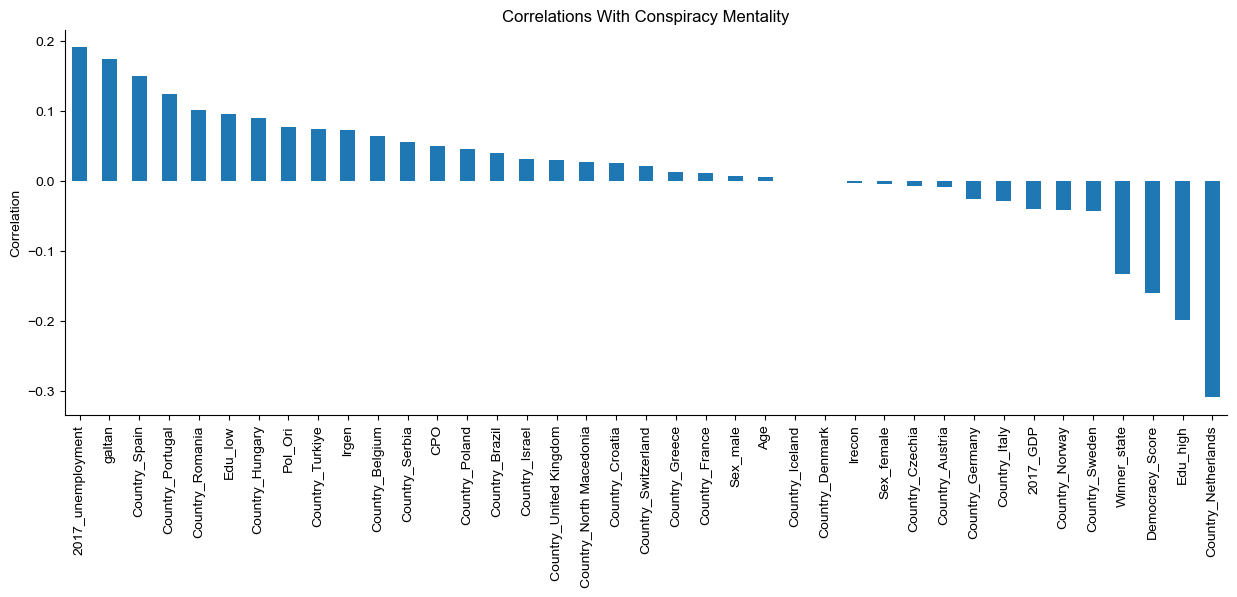

In [14]:
# Checking correlations with target and plotting
plt.figure(figsize=(15,5))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar')
plt.title("Correlations With Conspiracy Mentality")
plt.ylabel("Correlation")
sns.set_style('whitegrid')
sns.despine()
plt.show()

Some notes on these correlations:
- Some of the binary-encoded country variables have fairly strong correlations with the target: for example, `Country_Spain`, `Country_Portugal` and `Country_Romania` are in the top 5 positive correlations, while `Country_Netherlands` is the strongest negative correlation. Others have correlations close to 0, such as `Country_Iceland` and `Country_Denmark`. It might be interesting to see a version of the model that uses full country information as well as a version that does not include any country information.
- Some of the country-level features we added (in the previous notebook) are among the strongest correlations with our target: `2017_unemployment` (the strongest positive correlation) and `Democracy_Score` (the third-strongest negative correlation). `2017_GDP` has only a weak negative correlation.
- Some of the individual-level demographic features seem to have almost no correlation with the target: `Age`, `Sex_male` and `Sex_female`.
- Some measures of political orientation have relatively strong correlations with the target (`galtan`, `Pol_Ori`, and `lrgen`), while `lrecon` is very weakly correlated.
- The individual-level education columns both have fairly strong correlations: `Edu_low` and `Edu_high`.

We will start with an inclusive set of predictor features and then move to a smaller set of just the strongest correlations, seeing if we can maintain similar $R^2$ values with fewer features.

Next, we'll look at collinearity among the predictors.

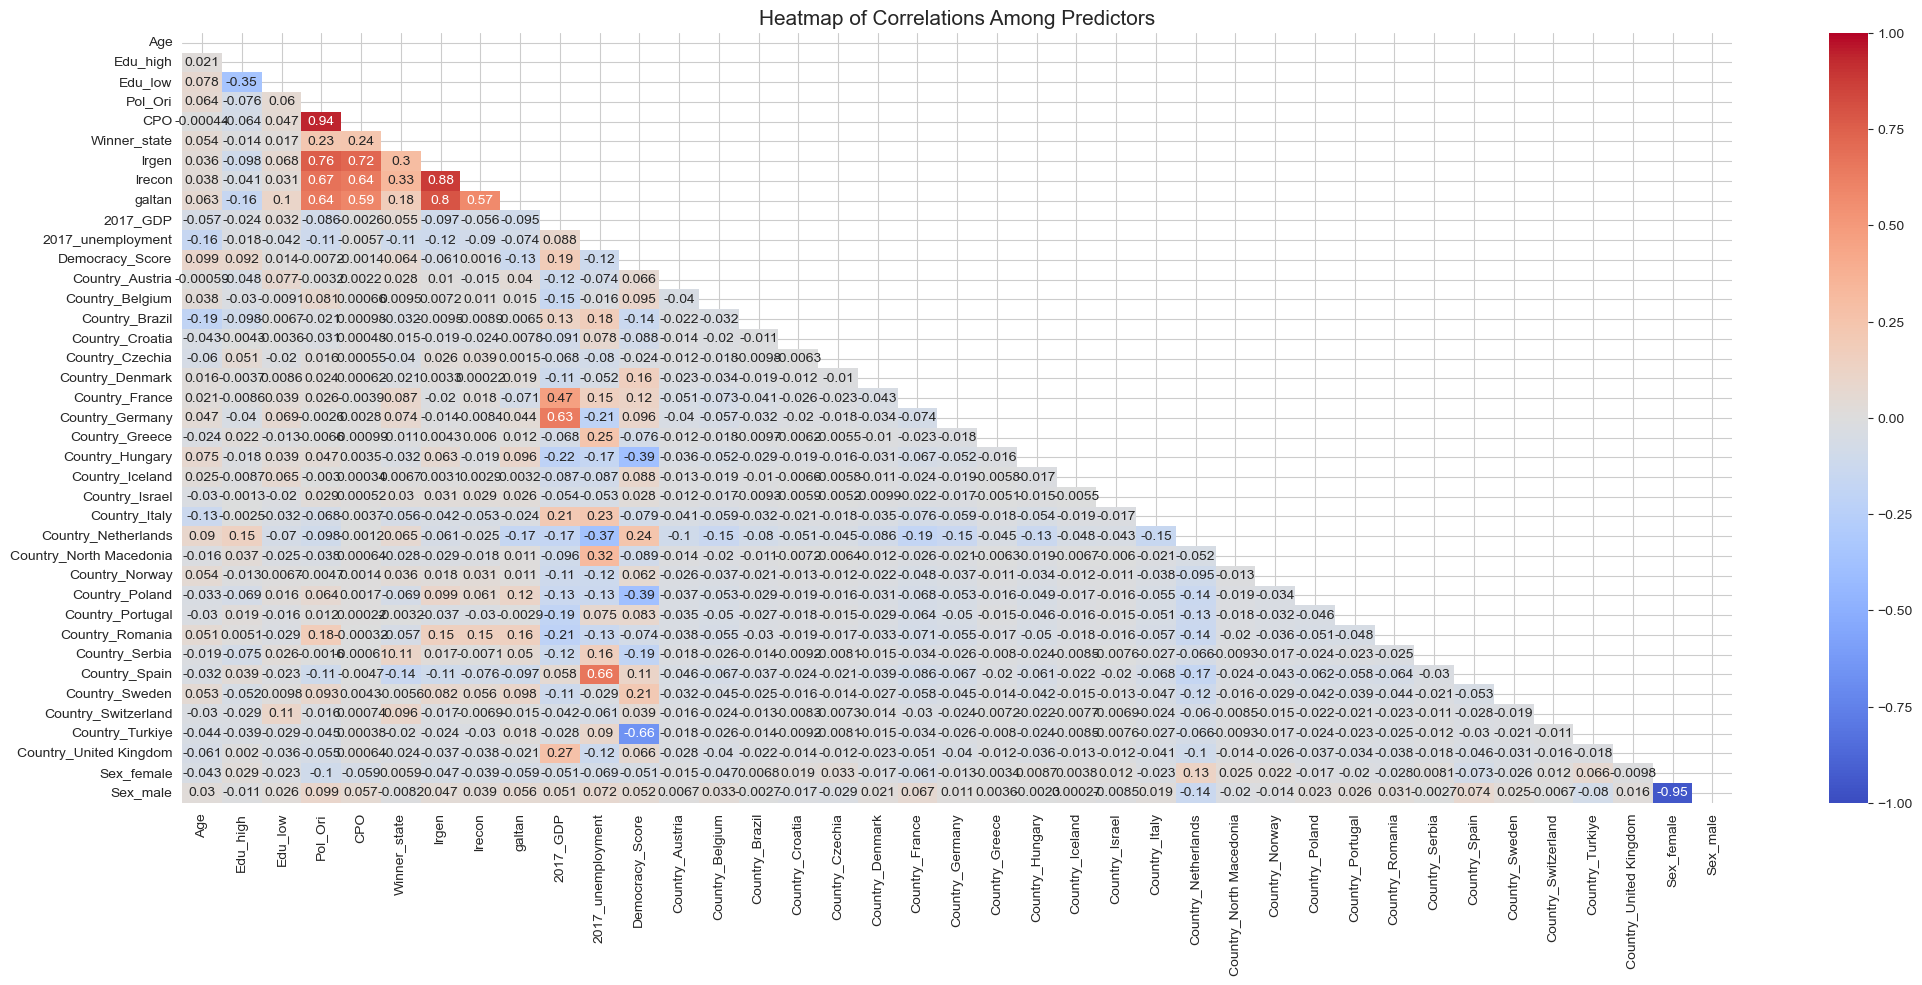

In [15]:
# Plotting correlations among predictors with heatmap
corrs = X.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corrs, cmap='coolwarm', vmin=-1, vmax=1, mask=np.triu(np.ones_like(corrs, dtype=bool)), annot=True)
plt.title('Heatmap of Correlations Among Predictors', fontsize=15)
plt.show()

Although this looks like an overwhelming amount of information, we need only focus on the few places where the correlations are above around 0.7 or below around -0.7 (i.e., the darker red and blue regions). We see the following cases of collinearity that must be addressed:
- **Between `CPO` and `Pol_Ori`**. Here, we will simply drop `CPO`, the centered version of political orientation, which was less strongly correlated with the target.
- **Between `lrgen` and `Pol_Ori`**. We will drop `lrgen`, for the same reason as `CPO`.
- **Between `lrecon` and `Pol_Ori`**. We will drop `lrecon`, since it had almost no correlation with the target.
- **Between `Sex_female` and `Sex_male`**. We will drop `Sex_female`, which had a slightly weaker correlation, although we don't expect either of these variables to be important coefficients in the model.

There are other relatively high correlations (roughly between absolute values of 0.6 and 0.7), including between `Country_Turkiye` and `Democracy_Score`, or `Country_Spain` and `2017_unemployment`, but we will leave these features in for now.

We'll now drop the features we chose in the process described above.

In [16]:
# Dropping CPO, lrgen, lrecon, and Sex_female from remainder and test sets
X_remainder_reduced = X_remainder.drop(columns=['CPO','lrgen','lrecon','Sex_female'])
X_test_reduced = X_test.drop(columns=['CPO','lrgen','lrecon','Sex_female'])

In [17]:
# Checking
X_remainder_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67411 entries, 59714 to 68268
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      67411 non-null  float64
 1   Edu_high                 67411 non-null  float64
 2   Edu_low                  67411 non-null  float64
 3   Pol_Ori                  67411 non-null  float64
 4   Winner_state             67411 non-null  float64
 5   galtan                   67411 non-null  float64
 6   2017_GDP                 67411 non-null  float64
 7   2017_unemployment        67411 non-null  float64
 8   Democracy_Score          67411 non-null  int64  
 9   Country_Austria          67411 non-null  uint8  
 10  Country_Belgium          67411 non-null  uint8  
 11  Country_Brazil           67411 non-null  uint8  
 12  Country_Croatia          67411 non-null  uint8  
 13  Country_Czechia          67411 non-null  uint8  
 14  Country_Denmark   

In [18]:
# Checking test
X_test_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16853 entries, 10642 to 34485
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      16853 non-null  float64
 1   Edu_high                 16853 non-null  float64
 2   Edu_low                  16853 non-null  float64
 3   Pol_Ori                  16853 non-null  float64
 4   Winner_state             16853 non-null  float64
 5   galtan                   16853 non-null  float64
 6   2017_GDP                 16853 non-null  float64
 7   2017_unemployment        16853 non-null  float64
 8   Democracy_Score          16853 non-null  int64  
 9   Country_Austria          16853 non-null  uint8  
 10  Country_Belgium          16853 non-null  uint8  
 11  Country_Brazil           16853 non-null  uint8  
 12  Country_Croatia          16853 non-null  uint8  
 13  Country_Czechia          16853 non-null  uint8  
 14  Country_Denmark   

We see the right dimensions and columns in our remainder and test sets.

A final step we can take before modelling is to scale our data. This will make it easier to compare the coefficients of the model. We will use the robust scaler, which uses the interquartile range to scale the data (which prevents outliers from distorting the scale).

In [19]:
# Scaling remainder and test sets
from sklearn.preprocessing import RobustScaler

my_scaler = RobustScaler()

# Remainder set
X_remainder_reduced_scaled = my_scaler.fit_transform(X_remainder_reduced)
X_remainder_reduced_scaled = pd.DataFrame(X_remainder_reduced_scaled, columns=X_remainder_reduced.columns)

# Test set
X_test_reduced_scaled = my_scaler.transform(X_test_reduced)
X_test_reduced_scaled = pd.DataFrame(X_test_reduced_scaled, columns=X_test_reduced.columns)

In [20]:
# Checking remainder set
X_remainder_reduced_scaled.head()

Age  Edu_high  Edu_low  Pol_Ori  Winner_state    galtan  2017_GDP  \
0  0.513595       0.0      0.0     0.75           0.0  0.283602 -0.369541   
1  0.646526      -1.0      0.0    -0.25           0.0 -0.115515  0.535029   
2 -0.217523       0.0      0.0     0.25           0.0  1.570717  3.188633   
3  0.220544       0.0      0.0     0.00           0.0  0.888618  0.000000   
4 -0.287009       0.0      0.0    -0.50           0.0 -0.894436  2.064333   

   2017_unemployment  Democracy_Score  Country_Austria  ...  Country_Poland  \
0           0.472648              0.0              0.0  ...             0.0   
1           2.689278              0.0              0.0  ...             0.0   
2          -0.258206              0.0              0.0  ...             0.0   
3          -0.019694              0.0              0.0  ...             0.0   
4          -0.131291              0.0              0.0  ...             0.0   

   Country_Portugal  Country_Romania  Country_Serbia  Country_Spain  \
0               0.0              0.0             0.0            0.0   
1               0.0              0.0             0.0            1.0   
2               0.0              0.0             0.0            0.0   
3               0.0              0.0             0.0            0.0   
4               0.0              0.0             0.0            0.0   

   Country_Sweden  Country_Switzerland  Country_Turkiye  \
0             0.0                  0.0              0.0   
1             0.0                  0.0              0.0   
2             0.0                  0.0              0.0   
3             0.0                  0.0              0.0   
4             0.0                  0.0              0.0   

   Country_United Kingdom  Sex_male  
0                     0.0      -1.0  
1                     0.0       0.0  
2                     0.0      -1.0  
3                     0.0      -1.0  
4                     1.0       0.0  

[5 rows x 35 columns]

In [21]:
# Checking test set
X_test_reduced_scaled.head()

Age  Edu_high  Edu_low  Pol_Ori  Winner_state    galtan  2017_GDP  \
0  0.329305       0.0      0.0    -0.25           0.0 -0.587460  0.000000   
1  0.788520       0.0      0.0    -0.50           0.0 -0.907525  0.000000   
2 -0.504532       0.0      0.0    -0.25           1.0 -0.850805  0.000000   
3 -0.830816       0.0      0.0     0.25           1.0  0.292041 -0.154766   
4 -0.141994       0.0      0.0    -1.00           0.0 -0.028360  0.028035   

   2017_unemployment  Democracy_Score  Country_Austria  ...  Country_Poland  \
0          -0.019694              0.0              0.0  ...             0.0   
1          -0.019694              0.0              0.0  ...             0.0   
2          -0.019694              0.0              0.0  ...             0.0   
3          -0.028446              0.0              0.0  ...             0.0   
4           1.288840             -9.0              0.0  ...             0.0   

   Country_Portugal  Country_Romania  Country_Serbia  Country_Spain  \
0               0.0              0.0             0.0            0.0   
1               0.0              0.0             0.0            0.0   
2               0.0              0.0             0.0            0.0   
3               0.0              0.0             0.0            0.0   
4               0.0              0.0             0.0            0.0   

   Country_Sweden  Country_Switzerland  Country_Turkiye  \
0             0.0                  0.0              0.0   
1             0.0                  0.0              0.0   
2             0.0                  0.0              0.0   
3             0.0                  1.0              0.0   
4             0.0                  0.0              1.0   

   Country_United Kingdom  Sex_male  
0                     0.0      -1.0  
1                     0.0       0.0  
2                     0.0      -1.0  
3                     0.0      -1.0  
4                     0.0       0.0  

[5 rows x 35 columns]

These values look correct, and we can move on to fitting our linear regression model.

In [22]:
# Converting y to list
y_remainder_list = list(y_remainder)

In [23]:
import statsmodels.api as sm

# Adding constant to X_
X_rem_with_cons = sm.add_constant(X_remainder_reduced_scaled)

# Instantiating and fitting the model
lin_reg_1 = sm.OLS(y_remainder_list, X_rem_with_cons)
results_1 = lin_reg_1.fit()

# Looking at the summary results
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     539.2
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:12:34   Log-Likelihood:            -1.3978e+05
No. Observations:               67411   AIC:                         2.796e+05
Df Residuals:                   67378   BIC:                         2.799e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.3794      0.019    276.977      0.000       5.341       5.417
Age                         0.1575      0.013     12.153      0.000       0.132       0.183
Edu_high                   -0.6298      0.017    -38.122      0.000      -0.662      -0.597
Edu_low                     0.1747      0.029      5.998      0.000       0.118       0.232
Pol_Ori                    -0.0451      0.016     -2.798      0.005      -0.077      -0.014
Winner_state               -0.6113      0.018    -34.507      0.000      -0.646      -0.577
galtan                      0.4491      0.014     31.172      0.000       0.421       0.477
2017_GDP                   -0.0014      0.015     -0.094      0.925      -0.030       0.028
2017_unemployment           0.1043      0.036      2.904      0.004       0.034       0.175
Democracy_Score            -0.1278      0.007    -18.208      0.000      -0.142      -0.114
Country_Austria            -0.0583      0.045     -1.281      0.200      -0.147       0.031
Country_Belgium             0.6606      0.036     18.262      0.000       0.590       0.731
Country_Brazil              0.2194      0.066      3.304      0.001       0.089       0.350
Country_Croatia             0.4462      0.103      4.330      0.000       0.244       0.648
Country_Czechia            -0.0080      0.093     -0.086      0.932      -0.190       0.174
Country_Denmark             0.2018      0.052      3.917      0.000       0.101       0.303
Country_France              0.3210      0.026     12.210      0.000       0.270       0.373
Country_Germany            -0.0832      0.063     -1.315      0.189      -0.207       0.041
Country_Greece             -0.0465      0.166     -0.280      0.780      -0.372       0.279
Country_Hungary             0.4559      0.038     12.004      0.000       0.381       0.530
Country_Iceland             0.2785      0.087      3.212      0.001       0.109       0.448
Country_Israel              1.2467      0.099     12.549      0.000       1.052       1.441
Country_Italy              -0.3006      0.041     -7.376      0.000      -0.380      -0.221
Country_Netherlands        -0.7362      0.022    -33.464      0.000      -0.779      -0.693
Country_North Macedonia     0.2469      0.169      1.462      0.144      -0.084       0.578
Country_Norway             -0.3962      0.049     -8.147      0.000      -0.491      -0.301
Country_Poland             -0.0910      0.037     -2.457      0.014      -0.164      -0.018
Country_Portugal            1.4422      0.048     29.754      0.000       1.347       1.537
Country_Romania             0.7507      0.036     20.964      0.000       0.681       0.821
Country_Serbia              0.6545      0.102      6.429      0.000       0.455       0.854
Country_Spain               1.1048      0.085  

We see an $R^2$ value of 0.204, which is close to that of our baseline model (around 0.21).

We see several predictors with p-values above 0.05, which indicates that they should be removed from future iterations of the model: `2017_GDP`, `Country_Austria`, `Country_Czechia`, `Country_Germany`, `Country_Greece`, `Country_North Macedonia`, and `Country_Turkey`. Before doing so, we can quickly plot the predictors arranged by their coefficient weights in the model.

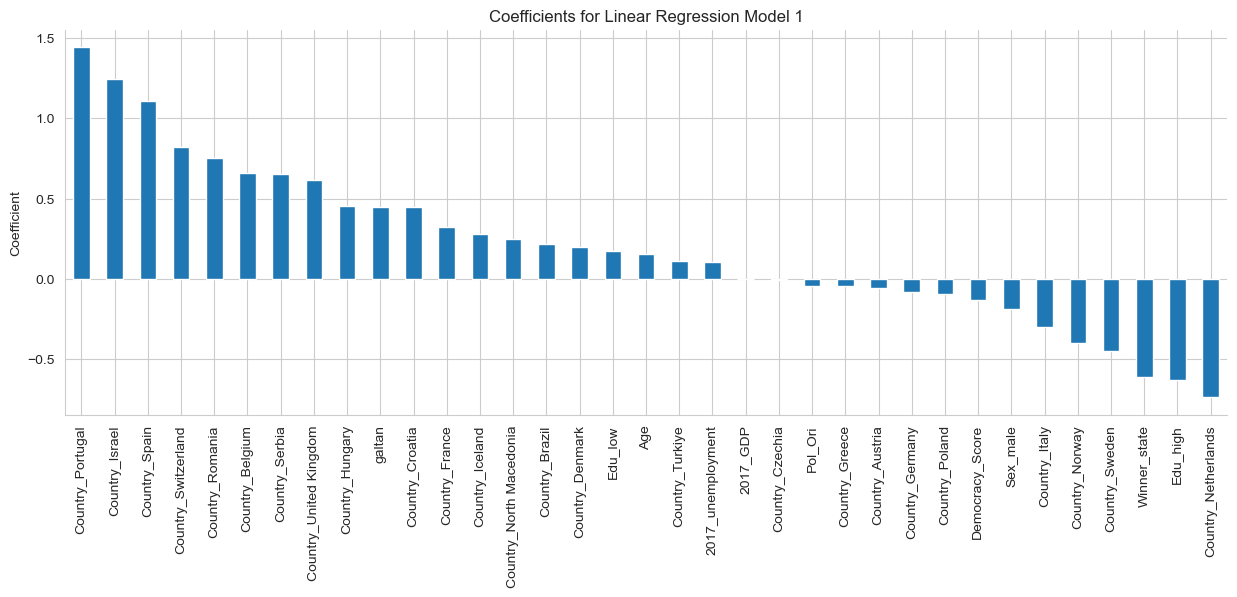

In [24]:
# Plotting Coefficients
plt.figure(figsize=(15,5))
results_1.params.sort_values(ascending=False).tail(-1).plot(kind='bar')
plt.ylabel('Coefficient')
plt.title('Coefficients for Linear Regression Model 1')
sns.despine()
plt.show()

Some of what we see here is unsurprising: the country variables that had strong positive or negative correlations with the target have high coefficients, for example. On the other hand, some predictors that had strong correlations (e.g., `2017_unemployment`) do not have strong coefficients in the model.

Let's now drop the columns with p-values greater than our significance threshold and re-fit the model.

In [25]:
# Dropping columns with p > 0.05
X_remainder_reduced_scaled = X_remainder_reduced_scaled.drop(columns=['2017_GDP',
                                                                      'Country_Austria',
                                                                      'Country_Czechia',
                                                                      'Country_Germany',
                                                                      'Country_Greece',
                                                                      'Country_North Macedonia',
                                                                      'Country_Turkiye'])

In [26]:
# Checking
X_remainder_reduced_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67411 entries, 0 to 67410
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     67411 non-null  float64
 1   Edu_high                67411 non-null  float64
 2   Edu_low                 67411 non-null  float64
 3   Pol_Ori                 67411 non-null  float64
 4   Winner_state            67411 non-null  float64
 5   galtan                  67411 non-null  float64
 6   2017_unemployment       67411 non-null  float64
 7   Democracy_Score         67411 non-null  float64
 8   Country_Belgium         67411 non-null  float64
 9   Country_Brazil          67411 non-null  float64
 10  Country_Croatia         67411 non-null  float64
 11  Country_Denmark         67411 non-null  float64
 12  Country_France          67411 non-null  float64
 13  Country_Hungary         67411 non-null  float64
 14  Country_Iceland         67411 non-null

In [27]:
# Refitting the model

# Adding constant to X_
X_rem_with_cons = sm.add_constant(X_remainder_reduced_scaled)

# Instantiating and fitting the model
lin_reg_2 = sm.OLS(y_remainder_list, X_rem_with_cons)
results_2 = lin_reg_2.fit()

# Looking at the summary results
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     616.0
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:12:35   Log-Likelihood:            -1.3978e+05
No. Observations:               67411   AIC:                         2.796e+05
Df Residuals:                   67382   BIC:                         2.799e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.3112      0.028    192.254      0.000       5.257       5.365
Age                        0.1578      0.013     12.237      0.000       0.133       0.183
Edu_high                  -0.6281      0.016    -38.181      0.000      -0.660      -0.596
Edu_low                    0.1750      0.029      6.010      0.000       0.118       0.232
Pol_Ori                   -0.0452      0.016     -2.811      0.005      -0.077      -0.014
Winner_state              -0.6126      0.018    -34.658      0.000      -0.647      -0.578
galtan                     0.4491      0.014     31.188      0.000       0.421       0.477
2017_unemployment          0.1427      0.018      8.000      0.000       0.108       0.178
Democracy_Score           -0.1426      0.009    -15.839      0.000      -0.160      -0.125
Country_Belgium            0.7121      0.041     17.502      0.000       0.632       0.792
Country_Brazil             0.1906      0.064      2.957      0.003       0.064       0.317
Country_Croatia            0.4341      0.092      4.707      0.000       0.253       0.615
Country_Denmark            0.2787      0.060      4.637      0.000       0.161       0.397
Country_France             0.3499      0.038      9.276      0.000       0.276       0.424
Country_Hungary            0.4881      0.048     10.205      0.000       0.394       0.582
Country_Iceland            0.3819      0.100      3.830      0.000       0.186       0.577
Country_Israel             1.3228      0.109     12.168      0.000       1.110       1.536
Country_Italy             -0.3008      0.041     -7.255      0.000      -0.382      -0.220
Country_Netherlands       -0.6667      0.029    -22.906      0.000      -0.724      -0.610
Country_Norway            -0.3200      0.055     -5.869      0.000      -0.427      -0.213
Country_Poland            -0.0653      0.046     -1.410      0.159      -0.156       0.025
Country_Portugal           1.4790      0.045     32.669      0.000       1.390       1.568
Country_Romania            0.8058      0.042     19.381      0.000       0.724       0.887
Country_Serbia             0.6099      0.075      8.079      0.000       0.462       0.758
Country_Spain              1.0696      0.057     18.759      0.000       0.958       1.181
Country_Sweden            -0.3781      0.050     -7.564      0.000      -0.476      -0.280
Country_Switzerland        0.8901      0.081     11.034      0.000       0.732       1.048
Country_United Kingdom     0.6898      0.052     13.268      0.000       0.588       0.792
Sex_male                  -0.1865      0.015    -12.265      0.000      -0.216      -0.157
==============================================================================
Omnibus:                      454.379   Durbin-Watson:                   2.009
Prob(Omnibus)

We see the same $R^2$ value as before, with no cases of p-values above threshold except for `Country_Poland`, which has increased to 0.16. Let's remove this feature and repeat.

In [28]:
# Dropping columns with p > 0.05
X_remainder_reduced_scaled = X_remainder_reduced_scaled.drop(columns=['Country_Poland'])

# Checking
X_remainder_reduced_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67411 entries, 0 to 67410
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     67411 non-null  float64
 1   Edu_high                67411 non-null  float64
 2   Edu_low                 67411 non-null  float64
 3   Pol_Ori                 67411 non-null  float64
 4   Winner_state            67411 non-null  float64
 5   galtan                  67411 non-null  float64
 6   2017_unemployment       67411 non-null  float64
 7   Democracy_Score         67411 non-null  float64
 8   Country_Belgium         67411 non-null  float64
 9   Country_Brazil          67411 non-null  float64
 10  Country_Croatia         67411 non-null  float64
 11  Country_Denmark         67411 non-null  float64
 12  Country_France          67411 non-null  float64
 13  Country_Hungary         67411 non-null  float64
 14  Country_Iceland         67411 non-null

In [29]:
# Refitting the model

# Adding constant to X_
X_rem_with_cons = sm.add_constant(X_remainder_reduced_scaled)

# Instantiating and fitting the model
lin_reg_3 = sm.OLS(y_remainder_list, X_rem_with_cons)
results_3 = lin_reg_3.fit()

# Looking at the summary results
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     638.8
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:12:36   Log-Likelihood:            -1.3978e+05
No. Observations:               67411   AIC:                         2.796e+05
Df Residuals:                   67383   BIC:                         2.799e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.2973      0.026    205.126      0.000       5.247       5.348
Age                        0.1580      0.013     12.250      0.000       0.133       0.183
Edu_high                  -0.6279      0.016    -38.169      0.000      -0.660      -0.596
Edu_low                    0.1757      0.029      6.038      0.000       0.119       0.233
Pol_Ori                   -0.0463      0.016     -2.881      0.004      -0.078      -0.015
Winner_state              -0.6104      0.018    -34.666      0.000      -0.645      -0.576
galtan                     0.4485      0.014     31.160      0.000       0.420       0.477
2017_unemployment          0.1517      0.017      9.109      0.000       0.119       0.184
Democracy_Score           -0.1372      0.008    -16.818      0.000      -0.153      -0.121
Country_Belgium            0.7210      0.040     17.936      0.000       0.642       0.800
Country_Brazil             0.1988      0.064      3.096      0.002       0.073       0.325
Country_Croatia            0.4452      0.092      4.845      0.000       0.265       0.625
Country_Denmark            0.2848      0.060      4.750      0.000       0.167       0.402
Country_France             0.3537      0.038      9.399      0.000       0.280       0.427
Country_Hungary            0.5189      0.043     12.198      0.000       0.436       0.602
Country_Iceland            0.3934      0.099      3.958      0.000       0.199       0.588
Country_Israel             1.3370      0.108     12.354      0.000       1.125       1.549
Country_Italy             -0.2949      0.041     -7.148      0.000      -0.376      -0.214
Country_Netherlands       -0.6542      0.028    -23.606      0.000      -0.708      -0.600
Country_Norway            -0.3059      0.054     -5.707      0.000      -0.411      -0.201
Country_Portugal           1.4843      0.045     32.894      0.000       1.396       1.573
Country_Romania            0.8252      0.039     21.023      0.000       0.748       0.902
Country_Serbia             0.6212      0.075      8.276      0.000       0.474       0.768
Country_Spain              1.0585      0.056     18.744      0.000       0.948       1.169
Country_Sweden            -0.3735      0.050     -7.488      0.000      -0.471      -0.276
Country_Switzerland        0.9019      0.080     11.239      0.000       0.745       1.059
Country_United Kingdom     0.7038      0.051     13.793      0.000       0.604       0.804
Sex_male                  -0.1876      0.015    -12.349      0.000      -0.217      -0.158
==============================================================================
Omnibus:                      453.916   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.599
Skew:                    

We now see no p-values above the threshold, with the same $R^2$ value as before. Let's plot the coefficient weights again as well.

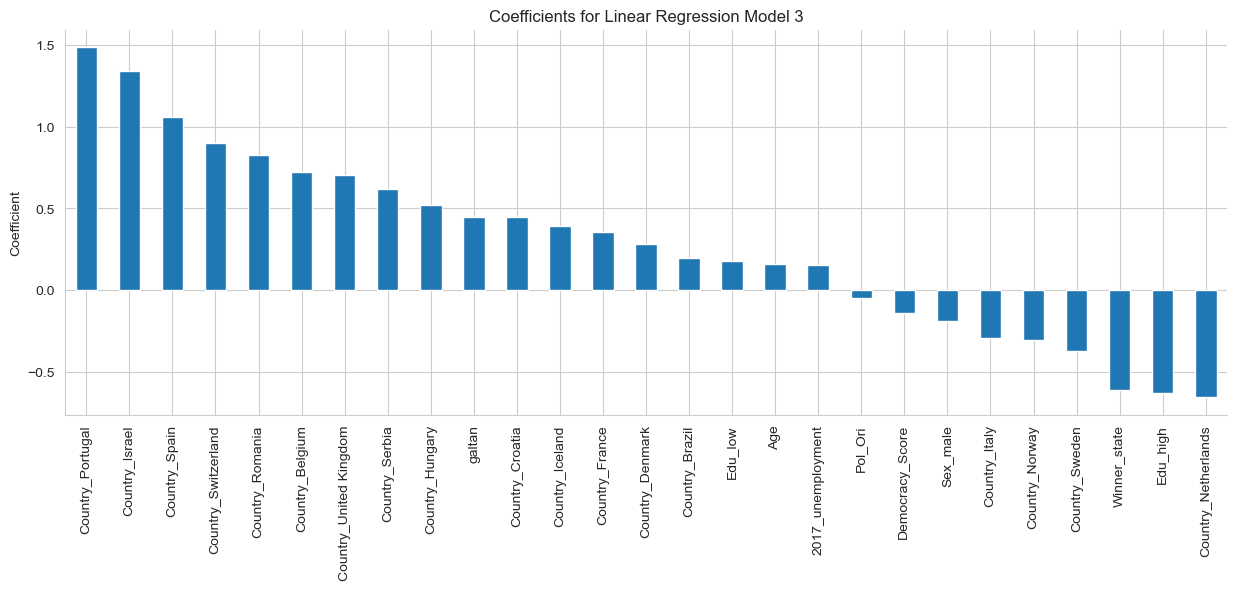

In [30]:
# Plotting Coefficients
plt.figure(figsize=(15,5))
results_3.params.sort_values(ascending=False).tail(-1).plot(kind='bar')
plt.ylabel('Coefficient')
plt.title('Coefficients for Linear Regression Model 3')
sns.despine()
plt.show()

Our model's predictions seem to be primarily based on the country variables, with some of the individual-level features like `Edu_high` and `Winner_state` having relatively strong negative affects on its predictions as well.

We will now try a version of the model that excludes all country information. After all, we might be interested in what lessons we can draw from the model that might be generalizable away from a particular geographical context.

In [31]:
# Creating version of X without any country info
X_remainder_individual = X_remainder_reduced_scaled[['galtan',
                                                    'Edu_low',
                                                    'Age',
                                                    '2017_unemployment',
                                                    'Pol_Ori',
                                                    'Democracy_Score',
                                                    'Sex_male',
                                                    'Winner_state',
                                                    'Edu_high']]

# Checking
X_remainder_individual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67411 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   galtan             67411 non-null  float64
 1   Edu_low            67411 non-null  float64
 2   Age                67411 non-null  float64
 3   2017_unemployment  67411 non-null  float64
 4   Pol_Ori            67411 non-null  float64
 5   Democracy_Score    67411 non-null  float64
 6   Sex_male           67411 non-null  float64
 7   Winner_state       67411 non-null  float64
 8   Edu_high           67411 non-null  float64
dtypes: float64(9)
memory usage: 4.6 MB


In [32]:
# Refitting the model

# Adding constant to X_
X_rem_with_cons = sm.add_constant(X_remainder_individual)

# Instantiating and fitting the model
lin_reg_4 = sm.OLS(y_remainder_list, X_rem_with_cons)
results_4 = lin_reg_4.fit()

# Looking at the summary results
results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     1146.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:12:36   Log-Likelihood:            -1.4266e+05
No. Observations:               67411   AIC:                         2.853e+05
Df Residuals:                   67401   BIC:                         2.854e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.3025      0.015    363.105      0.000       5.274       5.331
galtan                0.4957      0.015     33.736      0.000       0.467       0.524
Edu_low               0.2379      0.030      7.949      0.000       0.179       0.297
Age                   0.1620      0.013     12.413      0.000       0.136       0.188
2017_unemployment     0.4355      0.009     49.755      0.000       0.418       0.453
Pol_Ori               0.0438      0.016      2.664      0.008       0.012       0.076
Democracy_Score      -0.1481      0.006    -25.753      0.000      -0.159      -0.137
Sex_male             -0.0717      0.016     -4.570      0.000      -0.103      -0.041
Winner_state         -0.6921      0.018    -38.947      0.000      -0.727      -0.657
Edu_high             -0.6668      0.017    -39.343      0.000      -0.700      -0.634
==============================================================================
Omnibus:                      626.264   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.927
Skew:                          -0.136   Prob(JB):                    1.68e-109
Kurtosis:                       2.678   Cond. No.                         6.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see an $R^2$ value of only 0.13, which means that our model loses a bit less than half of its power to explain the variance in the target variable when we omit all information about countries. Let's quickly plot the coefficients for this version of the model as well.

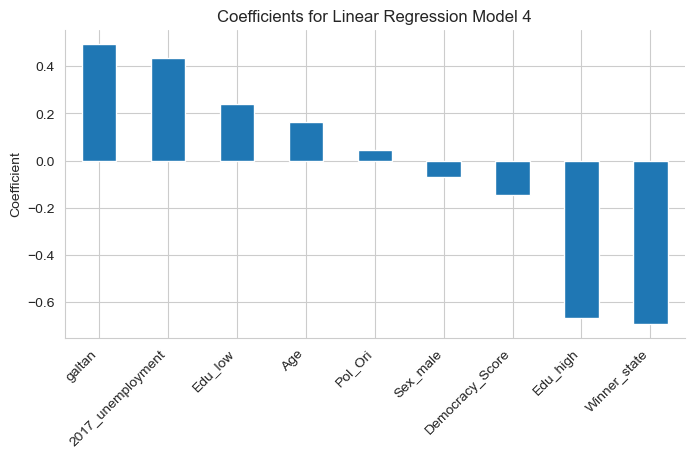

In [33]:
# Plotting Coefficients
plt.figure(figsize=(8,4))
results_4.params.sort_values(ascending=False).tail(-1).plot(kind='bar')
plt.ylabel('Coefficient')
plt.title('Coefficients for Linear Regression Model 4')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

We see that the strongest positive coefficients in our model are `galtan` and `2017_unemployment`, and the strongest negative coefficients are `Edu_high` and `Winner_state`. In the absence of country information, our model's predictions are based primarily on respondents' locations on the *social* version of the left-right spectrum, the unemployment rate of their country, their education status, and whether their preferred political party was in power.

Finally, let's see if we can create a version of the model including just the individual level features and the five country variables with the strongest correlations with the target that achieves similar $R^2$ values as our more inclusive model.

In [34]:
# Creating version of X without any country info
X_remainder_min = X_remainder_reduced_scaled[['galtan',
                                              'Edu_low',
                                              'Age',
                                              '2017_unemployment',
                                              'Pol_Ori',
                                              'Democracy_Score',
                                              'Sex_male',
                                              'Winner_state',
                                              'Edu_high',
                                              'Country_Spain',
                                              'Country_Portugal',
                                              'Country_Romania',
                                              'Country_Hungary',
                                              'Country_Netherlands']]

# Checking
X_remainder_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67411 entries, 0 to 67410
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   galtan               67411 non-null  float64
 1   Edu_low              67411 non-null  float64
 2   Age                  67411 non-null  float64
 3   2017_unemployment    67411 non-null  float64
 4   Pol_Ori              67411 non-null  float64
 5   Democracy_Score      67411 non-null  float64
 6   Sex_male             67411 non-null  float64
 7   Winner_state         67411 non-null  float64
 8   Edu_high             67411 non-null  float64
 9   Country_Spain        67411 non-null  float64
 10  Country_Portugal     67411 non-null  float64
 11  Country_Romania      67411 non-null  float64
 12  Country_Hungary      67411 non-null  float64
 13  Country_Netherlands  67411 non-null  float64
dtypes: float64(14)
memory usage: 7.2 MB


In [35]:
# Refitting the model

# Adding constant to X_
X_rem_with_cons = sm.add_constant(X_remainder_min)

# Instantiating and fitting the model
lin_reg_5 = sm.OLS(y_remainder_list, X_rem_with_cons)
results_5 = lin_reg_5.fit()

# Looking at the summary results
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1116.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:12:37   Log-Likelihood:            -1.4043e+05
No. Observations:               67411   AIC:                         2.809e+05
Df Residuals:                   67396   BIC:                         2.810e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4818      0.017    318.743      0.000       5.448       5.515
galtan                  0.4040      0.014     28.217      0.000       0.376       0.432
Edu_low                 0.1903      0.029      6.554      0.000       0.133       0.247
Age                     0.1521      0.013     11.948      0.000       0.127       0.177
2017_unemployment       0.1313      0.013     10.034      0.000       0.106       0.157
Pol_Ori                -0.0211      0.016     -1.314      0.189      -0.052       0.010
Democracy_Score        -0.1172      0.007    -17.907      0.000      -0.130      -0.104
Sex_male               -0.1814      0.015    -11.844      0.000      -0.211      -0.151
Winner_state           -0.5603      0.017    -32.159      0.000      -0.594      -0.526
Edu_high               -0.6314      0.017    -38.247      0.000      -0.664      -0.599
Country_Spain           0.9226      0.042     22.059      0.000       0.841       1.005
Country_Portugal        1.3038      0.039     33.537      0.000       1.228       1.380
Country_Romania         0.6636      0.037     18.085      0.000       0.592       0.736
Country_Hungary         0.3923      0.042      9.291      0.000       0.310       0.475
Country_Netherlands    -0.8582      0.020    -42.820      0.000      -0.897      -0.819
==============================================================================
Omnibus:                      487.679   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.259
Skew:                          -0.167   Prob(JB):                     3.77e-99
Kurtosis:                       2.776   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that we can reach an $R^2$ value of 0.188 (which is 92% of the $R^2$ value of our best model) by including just the individual features and these five country variables.

Let's quickly plot the coefficients for this version of the model as well.

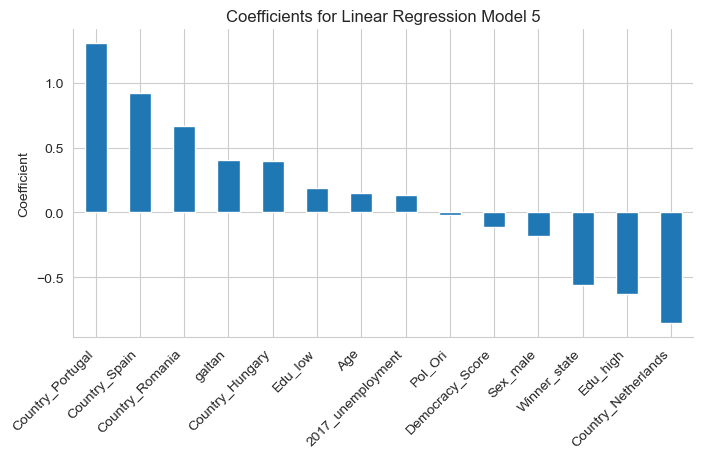

In [36]:
# Plotting Coefficients
plt.figure(figsize=(8,4))
results_5.params.sort_values(ascending=False).tail(-1).plot(kind='bar')
plt.ylabel('Coefficient')
plt.title('Coefficients for Linear Regression Model 5')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

Again, the country variables tend to have the strongest influence on our model's predictions, with `galtan` and the education variables having a fairly strong effect as well.

One possibility to consider is that the reason variables related to political orientation do not have stronger coefficients in the model is that their relationships with conspiracy mentality are non-linear. In our exploratory data analysis in the previous notebook, we saw evidence of a quadratic relationsihp between `Pol_Ori` and `CM5x`. It could be that these features turn out to play a larger role in the decisions of our non-linear models. We will investigate this further in [Part 2](#part2) of this notebook.

The next thing we'll do is see how our model performs on the test data. Then, we'll assess the model's residuals. We'll use the most recent version of the model, with just the top 5 country variables.


In [37]:
# Reducing test set variables
X_test_min = X_test_reduced_scaled[['galtan',
                                    'Edu_low',
                                    'Age',
                                    '2017_unemployment',
                                    'Pol_Ori',
                                    'Democracy_Score',
                                    'Sex_male',
                                    'Winner_state',
                                    'Edu_high',
                                    'Country_Spain',
                                    'Country_Portugal',
                                    'Country_Romania',
                                    'Country_Hungary',
                                    'Country_Netherlands']]

In [38]:
# Adding constant to test data
X_test_with_cons = sm.add_constant(X_test_min)

# Making predictions on test data
y_pred = results_5.predict(X_test_with_cons)

In [39]:
# Getting the R2 score for the test data
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared for test data:", r2)

R-squared for test data: 0.19307468970434105


We see that our model has a slightly higher $R^2$ score on the test data. This is a good sign, since we now know the model isn't overfitting to the training data.

We now want to look at the residuals for the model. We'll start by seeing if the residuals form a normal distribution. We can begin by looking at a histogram of the residuals.

In [40]:
# Getting residuals
residuals = y_test.reset_index(drop=True) - y_pred

# Checking
residuals

0        1.379581
1        0.015111
2       -0.026921
3        0.914558
4        3.305953
           ...   
16848   -2.056123
16849    0.731880
16850   -3.602380
16851   -1.669697
16852    0.306210
Length: 16853, dtype: float64

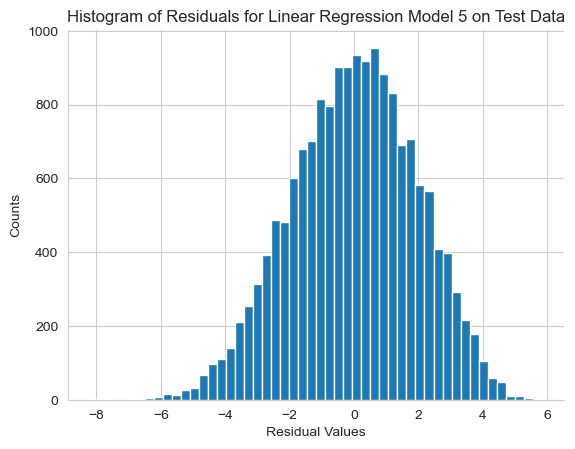

In [41]:
# Plotting residuals
plt.figure()
plt.hist(residuals, bins=50)
plt.title('Histogram of Residuals for Linear Regression Model 5 on Test Data')
plt.xlabel('Residual Values')
plt.ylabel('Counts')
sns.despine()
plt.show()

This is somewhat encouraging--the residuals indeed seem to form a normal distribution, although perhaps slightly left-skewed. We can also use a Shapiro-Wilk test to assess the hypothesis that our residuals come from a normal distribution. The test attempts to detect non-normality in the distribution of a variable. Assuming the test works as it should, if the p-value is very low, then we can reject the hypothesis that our residuals are normally distributed. If not, then we can continue under the assumption that the residuals are normally distributed.

Here, we are considering:

$H_0$: The residuals come from a normal distribution.<br>
$H_1$: The residuals do not come from a normal distribution.

In [42]:
# Running Shapiro-Wilk test
from scipy import stats

tstat, pval = stats.shapiro(residuals)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))

Shapiro-Wilk test on residuals: p-value = 0.000


/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p-value here is close to 0 (although we did receive a warning that the p-value may not be accurate for the number of data points we have). The Shapiro-Wilk test is very sensitive and often fails for large samples, and so we cannot simply accept the results at face value. Another test we can use is the Q-Q plot, which is another visual test where we compare the model residuals against what we would expect to see from a normal distribution. The more our data points stick closely to the reference line in the plot, the more confident we can be that they are drawn from a normal distribution.

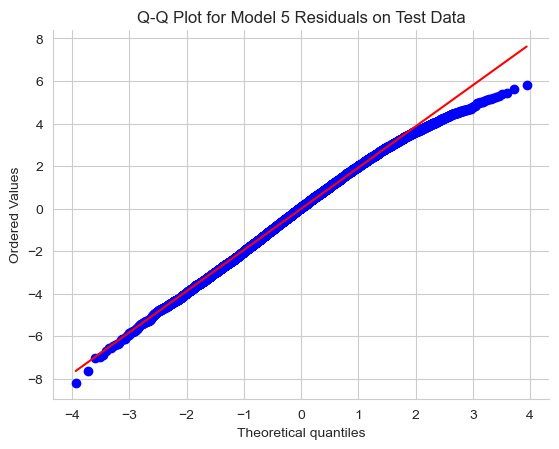

In [43]:
# Creating Q-Q/Probability Plot
plt.figure()
stats.probplot(residuals, dist="norm", plot = plt)
plt.title('Q-Q Plot for Model 5 Residuals on Test Data')
sns.despine()
plt.show()

The Q-Q plot seems to lend further visual support to what we saw from the histogram--the residuals seem to be fairly normally distributed, although with a slight left skew.

Now, we'll look at the pattern of variance in our residuals across the range of our predictor variables. Here, we want to ensure that the residuals exhibit homoscedasticity, meaning that the variance is consistent across the range of values (i.e., we want our model to work well across all values in our predictors--not just within some narrow range).

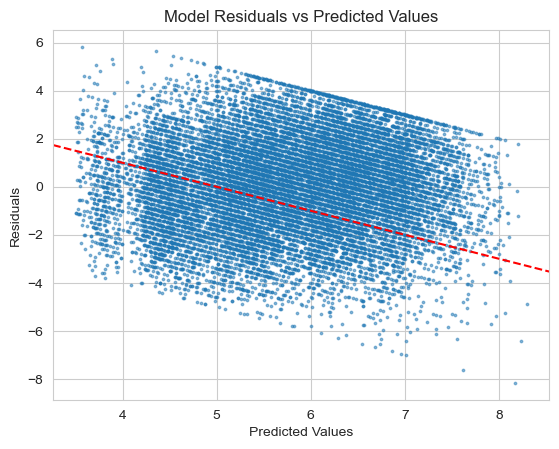

In [44]:
# Plotting residuals against fitted values
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5, s=3)
plt.axline(xy1=(4,1),xy2=(5,0), color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Model Residuals vs Predicted Values')
plt.show()

We need to be careful in interpretting this plot, since the range of possible values of our residuals is constrained by the limits of the values in our target variable (since `CM5x` only ranges from 0 to 10). To illustrate, if our model predicts that a data point should have a `CM5x` value of, e.g., 8, the range of possible errors goes from -8 to +2. So although it might appear that there is a pattern in the distribution of residuals across the range of values here with sharp boundaries, the pattern is really explained by the limits in the range of possible errors for any given prediction. The red dotted line in the plot above shows the center of the range of possible residual values for a given predicted value.

Despite this, we can discern some heteroscedasticity (i.e., patterning in variance) in the residuals across the range of predictions. The model's predictions seem to miss equally in both directions in the middle of the value range (around 5 or 6) but to fairly consistently underestimate conspiracy mentality when it predicts a high value (e.g., 7 or above) and overestimate conspiracy mentality when it predicts a low value (e.g., 4.5 or below). We might take this result as further evidence of the limitations of the linear modeling approach to our dataset.

We'll now move on to modeling with a non-linear regressor.

<a id = '1.1.2'></a>
### 1.1.2 - Gradient Boosting Regressor

In our baseline modeling in the previous notebook, we found that the best-performing regression model in terms of $R^2$ value was the Gradient Boosting regressor. Boosting is a technique for machine learning with ensemble models (models made out of collections of sub-models) where the constituent sub-models are trained sequentially and 'learn' from the errors of the previous sub-models.

The sub-models in Gradient Boosting ensemble models are decision trees, which generate predictions by creating a series of binary choices (involving thresholds in the predictors) which partition the data into distinct 'branches' and 'leaves'. The 'depth' of the tree is the number of such choices. Typically, shallow decision trees (depth 1 or 2) might perform poorly on the test and training sets, while deep decision trees often badly overfit to the training data. We can control the maximum depth parameter for the sub-model trees in our Gradient Boosting model.

With Gradient Boosting, the sub-models are trained on the residuals of their predecessors, meaning that the weight of the loss function for a given data point in sub-model $n$ depends on the loss function for that data point in sub-model $n-1$. Intuitively, such models achieve better performance than individual models by creating a chain of models that pay greater 'attention' to the data points that caused greater errors in their predecessors. Each successive sub-model represents an approximate step in the direction where the slope of the loss function is negative (essentially, achieving gradient descent learning by iterating on the previous model). The final predictions of the model are based on a weighted sum of the predictions of the sub-models.

We will need to consider at least the following parameters for the model:
- **Loss**: the loss function. This should be 'squared error' for a regression problem
- **Learning rate**: scales the contributions of each tree towards the predictions (the default is 0.1).
- **Number of estimators**: how many sub-models are created (default is 100).
- **Maximum depth**: the maximum depth of the sub-model trees.

We will experiment with these parameters, and then try to fine-tune them using a GridSearchCV.


We'll begin by scaling the full remainder and test sets we created earlier using the robust scaler.

In [45]:
# Scaling X with robust scaler

# Remainder
X_remainder_scaled = my_scaler.fit_transform(X_remainder)
X_remainder_scaled = pd.DataFrame(X_remainder_scaled, columns=X_remainder.columns)

# Test
X_test_scaled = my_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [46]:
# Checking
print("Remainder set shape:", X_remainder_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Remainder set shape: (67411, 39)
Test set shape: (16853, 39)


For experimenting with the model hyperparameters, we will now divide our remainder set into a training set and a validation set.

In [47]:
# Splitting train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder_scaled, y_remainder, test_size=.2, random_state=0)

In [48]:
# Checking
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (53928, 39)
Validation set shape: (13483, 39)


In our baseline modeling, we noted a fairly good result with the Gradient Boosting regressor at a maximum depth setting of 5. Let's try a few settings and compare the resulting $R^2$ values.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

depths = [2,3,4,5,6,7]
train_r2s = {}
val_r2s = {}

for depth in depths:

    # Instantiating and fitting models
    gbr = GradientBoostingRegressor(max_depth=depth, random_state=0)
    gbr.fit(X_train, y_train)
    
    # Recording R^2 scores
    train_r2s[depth] = gbr.score(X_train, y_train)
    val_r2s[depth] = gbr.score(X_val, y_val)

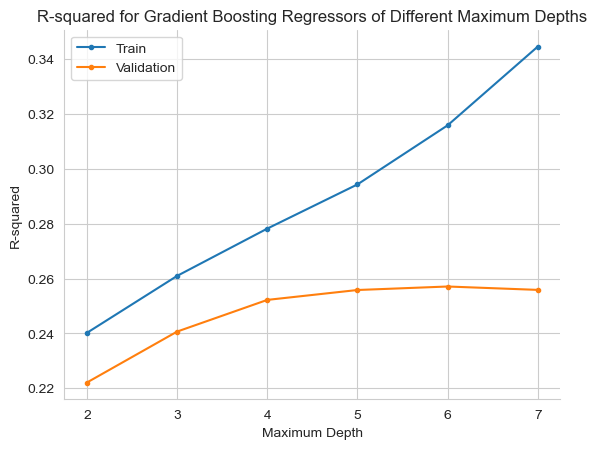

In [50]:
# Plotting
plt.figure()
plt.plot(train_r2s.keys(), train_r2s.values(), marker='.', label='Train')
plt.plot(val_r2s.keys(), val_r2s.values(), marker='.', label='Validation')
plt.xlabel('Maximum Depth')
plt.ylabel('R-squared')
plt.title('R-squared for Gradient Boosting Regressors of Different Maximum Depths')
plt.legend()
sns.despine()
plt.show()

We are seeing somewhat worse $R^2$ scores than what we observed with our baseline model (close to .26 on our validation set, whereas we saw .274 on our test set with the baseline model). The model appears to begin overfitting badly once the max depth exceeds 5.

Let's now try different values of the number of estimators. The default is 100 and we will try decreasing and increasing this number. We will keep a max depth setting of 5.

In [51]:
Ns = [25,50,75,100,125,150,175,300,500,1000]
train_r2s = {}
val_r2s = {}

for N in Ns:

    # Instantiating and fitting models
    gbr = GradientBoostingRegressor(max_depth=5, n_estimators=N, random_state=0)
    gbr.fit(X_train, y_train)
    
    # Recording R^2 scores
    train_r2s[N] = gbr.score(X_train, y_train)
    val_r2s[N] = gbr.score(X_val, y_val)

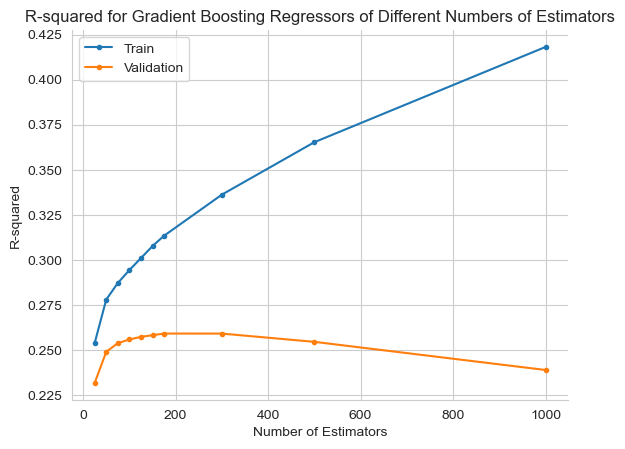

In [52]:
# Plotting
plt.figure()
plt.plot(train_r2s.keys(), train_r2s.values(), marker='.', label='Train')
plt.plot(val_r2s.keys(), val_r2s.values(), marker='.', label='Validation')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.title('R-squared for Gradient Boosting Regressors of Different Numbers of Estimators')
plt.legend()
sns.despine()
plt.show()

Although the $R^2$ for the validation set keeps increasing after , the distance from the $R^2$ of the training data increases much more rapidly. To avoid overfitting, we will stick with 100 estimators for now.

We'll now try different values of the learning rate parameter. The default is 0.1, and we can try some values that are smaller and larger than this.

In [53]:
LRs = [0.01,0.05,0.1,0.2,0.3,0.5]
train_r2s = {}
val_r2s = {}

for LR in LRs:

    # Instantiating and fitting models
    gbr = GradientBoostingRegressor(max_depth=5, learning_rate=LR, random_state=0)
    gbr.fit(X_train, y_train)
    
    # Recording R^2 scores
    train_r2s[LR] = gbr.score(X_train, y_train)
    val_r2s[LR] = gbr.score(X_val, y_val)

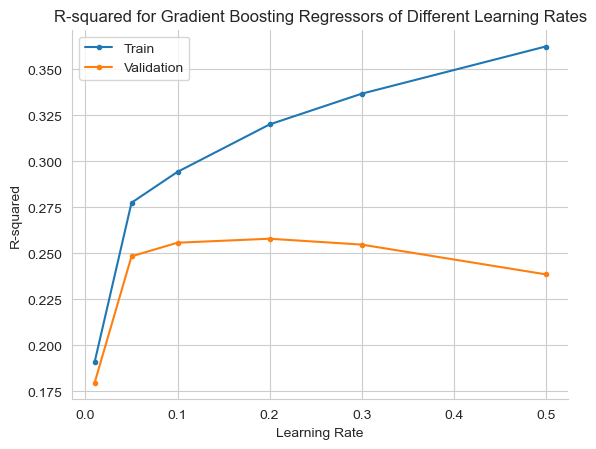

In [54]:
# Plotting
plt.figure()
plt.plot(train_r2s.keys(), train_r2s.values(), marker='.', label='Train')
plt.plot(val_r2s.keys(), val_r2s.values(), marker='.', label='Validation')
plt.xlabel('Learning Rate')
plt.ylabel('R-squared')
plt.title('R-squared for Gradient Boosting Regressors of Different Learning Rates')
plt.legend()
sns.despine()
plt.show()

Here, we see the model badly underfitting when the learning rate is below 0.05, and badly overfitting when the learning rate exceeds 0.1.

We will now use GridSearchCV to attempt to find optimal settings for these hyperparameters. We'll look within the ranges that make sense given the results we've observed so far.

In [55]:
# Set up a directory to cache the pipeline results
from tempfile import mkdtemp
cachedir = mkdtemp()

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Creating estimators and pipeline
estimators = [('model', GradientBoostingRegressor(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [GradientBoostingRegressor()],
             'model__max_depth': [3,5,7],
             'model__n_estimators': [80,100,120],
             'model__learning_rate': [0.075,0.1,0.15]}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
fittedgrid = grid.fit(X_remainder_scaled, y_remainder)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [57]:
# Best hyperparameters
print("Best model parameters:", fittedgrid.best_params_)
print("Best model R^2 score:", fittedgrid.best_score_)

Best model parameters: {'model': GradientBoostingRegressor(learning_rate=0.15, max_depth=5, n_estimators=120), 'model__learning_rate': 0.15, 'model__max_depth': 5, 'model__n_estimators': 120}
Best model R^2 score: 0.2676200065139338


We see that the best model discovered had a mean $R^2$ score of 0.27 across the five validation folds with the following parameters:
- learning_rate: 0.15
- max_depth: 5
- n_estimators: 120

We can do another GridSearchCV to try to fine-tune these further. The learning rate and number of estimators of our best model were the highest in the search range, so we should try higher settings for these hyperparameters. We will stick with a maximum depth of 5.

In [58]:
# Fine-tuning the hyperparameters

# Creating estimators and pipeline
estimators = [('model', GradientBoostingRegressor(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [GradientBoostingRegressor()],
             'model__max_depth': [5],
             'model__n_estimators': [120,150,175,200],
             'model__learning_rate': [0.075,0.1,0.15,0.2]}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
fittedgrid = grid.fit(X_remainder_scaled, y_remainder)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [59]:
# Best hyperparameters
print("Best model parameters:", fittedgrid.best_params_)
print("Best model R^2 score:", fittedgrid.best_score_)

Best model parameters: {'model': GradientBoostingRegressor(learning_rate=0.15, max_depth=5, n_estimators=120), 'model__learning_rate': 0.15, 'model__max_depth': 5, 'model__n_estimators': 120}
Best model R^2 score: 0.26765110712633716


Our second search returned the same best parameters as our first. Let's also quickly check whether changing the max_features parameter (which can help control overfitting) will increase performance.

In [60]:
# Testing different values for max_features

max_fs = [0.1,0.25,0.5,0.75,1.0]
train_r2s = {}
val_r2s = {}

for max_f in max_fs:

    # Instantiating and fitting models
    gbr = GradientBoostingRegressor(max_depth=5,
                                    n_estimators=120,
                                    learning_rate=0.15,
                                    max_features=max_f,
                                    random_state=0)
    gbr.fit(X_train, y_train)
    
    # Recording R^2 scores
    train_r2s[max_f] = gbr.score(X_train, y_train)
    val_r2s[max_f] = gbr.score(X_val, y_val)

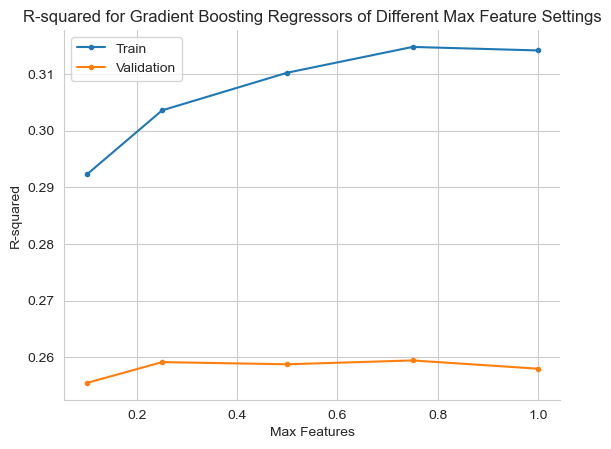

In [61]:
# Plotting
plt.figure()
plt.plot(train_r2s.keys(), train_r2s.values(), marker='.', label='Train')
plt.plot(val_r2s.keys(), val_r2s.values(), marker='.', label='Validation')
plt.xlabel('Max Features')
plt.ylabel('R-squared')
plt.title('R-squared for Gradient Boosting Regressors of Different Max Feature Settings')
plt.legend()
sns.despine()
plt.show()

Varying the max_features does not seem to have much effect on our validation $R^2$ score or on overfitting.

We can also check whether changing the min_samples_leaf parameter can help boost performance (again, this might help with overfitting).

In [62]:
# Testing different values for max_features

min_ss = [5,15,30,45,60,75]
train_r2s = {}
val_r2s = {}

for min_s in min_ss:

    # Instantiating and fitting models
    gbr = GradientBoostingRegressor(max_depth=5,
                                    n_estimators=120,
                                    learning_rate=0.15,
                                    min_samples_leaf=min_s,
                                    random_state=0)
    gbr.fit(X_train, y_train)
    
    # Recording R^2 scores
    train_r2s[min_s] = gbr.score(X_train, y_train)
    val_r2s[min_s] = gbr.score(X_val, y_val)

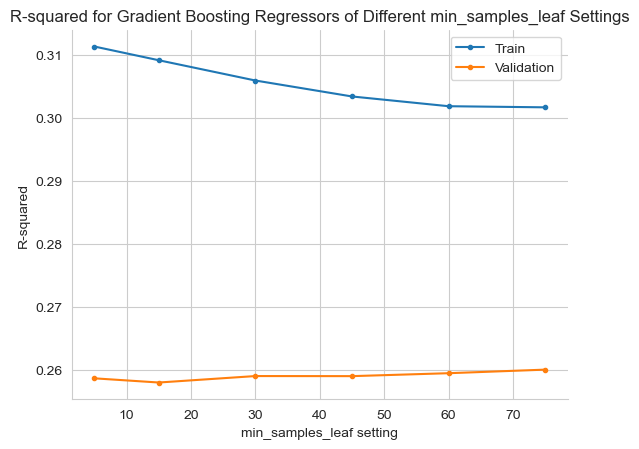

In [63]:
# Plotting
plt.figure()
plt.plot(train_r2s.keys(), train_r2s.values(), marker='.', label='Train')
plt.plot(val_r2s.keys(), val_r2s.values(), marker='.', label='Validation')
plt.xlabel('min_samples_leaf setting')
plt.ylabel('R-squared')
plt.title('R-squared for Gradient Boosting Regressors of Different min_samples_leaf Settings')
plt.legend()
sns.despine()
plt.show()

Again, varying the min_samples_leaf setting does not seem to help with $R^2$ or overfittting.

We will now train a version of the model with the best settings discovered by GridSearchCV on the full remainder set and then check its performance on the remainder and test sets.

In [64]:
# Training model with best parameters on remainder set
gbr = GradientBoostingRegressor(max_depth=5,
                                n_estimators=120,
                                learning_rate=0.15,
                                random_state=0)
gbr.fit(X_remainder_scaled, y_remainder)

# Checking R^2 for remainder and test sets
print("Remainder R^2:", gbr.score(X_remainder_scaled, y_remainder))
print("Test R^2:", gbr.score(X_test_scaled, y_test))

Remainder R^2: 0.30504268728433914
Test R^2: 0.2756878885034143


We see a slightly higher $R^2$ score on the test set than we saw on our validation folds.

It is difficult to interpret ensemble models, but we can look at feature importances for our final model which will tell us the total reduction in the criterion (the function measuring the quality of splits in the individual tree sub-models) achieved via a feature. (Later on, we'll look at more advanced model-agnostic methods for interpretting such models).

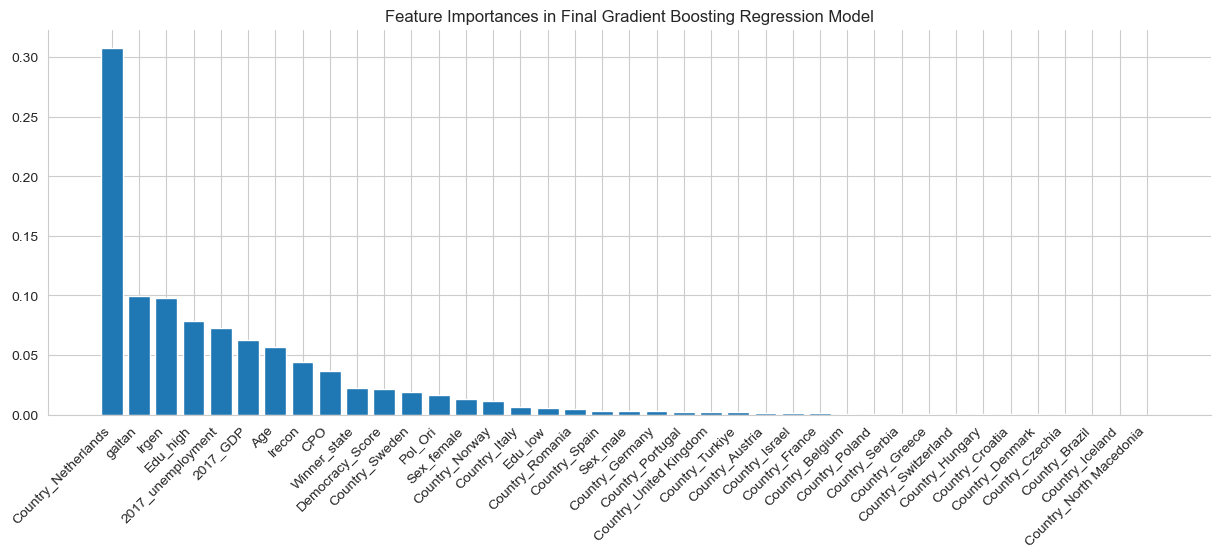

In [65]:
# Creating dataframe of feature importances in model
importances = pd.DataFrame(gbr.feature_importances_, index=X_remainder.columns, columns=["feature_importance"])
importances = importances.sort_values(by="feature_importance", ascending=False)

# Plotting
plt.figure(figsize=(15,5))
plt.bar(importances.index, importances.feature_importance)
plt.title('Feature Importances in Final Gradient Boosting Regression Model')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

It's interesting to note that the country variables are playing less of a role overall (at least, as measured by the feature importances attribute) in our Gradient Boosting regressor than they did in our linear regression model. For instance, the Spain and Portugal variables were among the largest coefficients in the linear regression model, but have relatively low feature importance scores here. The exception is the `Country_Netherlands`, which is not only the most important feature in the model but has a feature importance score three times that of the runner-up. We know that the Netherlands has a relatively low mean conspiracy mentality score, and it could be that this low score is not predictable from any combination of other features in our dataset.

Another interesting thing to note about this result is that some features that played very little role in the linear model have high feature importance scores: for instance, `Age`, and some of the political spectrum features (aside from `galtan`, which had a high coefficient in our linear model). It could be that our Gradient Boosting model is discovering non-linear relationships between these features and the target, or interactions between these features, that the linear model could not detect.

<a id = '1.2'></a>
## 1.2 - Classification Models

We'll now move on to our classification models, beginning with logistic regression. With classification models, we are trying to predict the class membership of a data point rather than predicting a continuous value. Here, we'll use the `CMQ_above_avg` feature, which records whether a respondent had a CMQ score above the mean. We can start by separating our predictors and target again.

In [66]:
# Separting predictors and target
X = dummy_df.drop(columns=['CMQ_1','CMQ_2','CMQ_3','CMQ_4','CMQ_5','CM4x','CM5x','CMQ_above_avg','CMQ_high'])
y = dummy_df.CMQ_above_avg

# Checking X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84264 entries, 0 to 84263
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      84264 non-null  float64
 1   Edu_high                 84264 non-null  float64
 2   Edu_low                  84264 non-null  float64
 3   Pol_Ori                  84264 non-null  float64
 4   CPO                      84264 non-null  float64
 5   Winner_state             84264 non-null  float64
 6   lrgen                    84264 non-null  float64
 7   lrecon                   84264 non-null  float64
 8   galtan                   84264 non-null  float64
 9   2017_GDP                 84264 non-null  float64
 10  2017_unemployment        84264 non-null  float64
 11  Democracy_Score          84264 non-null  int64  
 12  Country_Austria          84264 non-null  uint8  
 13  Country_Belgium          84264 non-null  uint8  
 14  Country_Brazil        

In [67]:
# Checking
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 84264 entries, 0 to 84263
Series name: CMQ_above_avg
Non-Null Count  Dtype
--------------  -----
84264 non-null  int64
dtypes: int64(1)
memory usage: 658.4 KB


We can also split the data into remainder and test sets.

In [68]:
# Splitting remainder and test
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [69]:
# Checking
print("X remainder shape:", X_remainder.shape)
print("y remainder shape:", y_remainder.shape)
print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

X remainder shape: (67411, 39)
y remainder shape: (67411,)
X test shape: (16853, 39)
y test shape: (16853,)


We can now begin working on our logistic regression model.

<a id = '1.2.1'></a>
### 1.2.1 - Logistic Regression

Logistic regression faces some of the same requirements as linear regression: specifically, that there is a linear relationship between each predictor variable and the target, and that there is no collinearity or multicollinearity among the predictors themselves. This means that we can use our analysis of the linear relationships between target and predictors and among the predictors that we performed in the previous section to guide our feature selection here. In fact, our approach here will be to begin with the minimal set of features we ended up with in our final linear regression model, and then try to add features to boost the model's performance if necessary.

First, we will split our data into training and validation sets.

In [70]:
# Splitting remainder and validation
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.2, stratify=y_remainder, random_state=0)

In [71]:
# Checking
print("X train shape:", X_train.shape)
print("X validation shape:", X_val.shape)
print("y train shape:", y_train.shape)
print("y validation shape:", y_val.shape)

X train shape: (53928, 39)
X validation shape: (13483, 39)
y train shape: (53928,)
y validation shape: (13483,)


In [72]:
# Reducing training and remainder set columns
X_remainder_reduced = X_remainder.drop(columns=['CPO','lrgen','lrecon','Sex_female'])
X_test_reduced = X_test.drop(columns=['CPO','lrgen','lrecon','Sex_female'])

In [73]:
# Checking
print(X_remainder_reduced.shape)
print(X_test_reduced.shape)

(67411, 35)
(16853, 35)


Next, we'll use the robust scaler to scale the data again.

In [74]:
# Scaling
rs = RobustScaler()
X_train_scaled = rs.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = rs.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

In [75]:
# Checking
X_train_scaled.head()

Age  Edu_high  Edu_low  Pol_Ori       CPO  Winner_state     lrgen  \
0  1.021472      -1.0      0.0     0.75  0.582324           1.0 -0.306525   
1 -0.592025       0.0      0.0     0.50  0.966597           0.0  0.265366   
2 -0.082822      -1.0      0.0    -1.00 -0.948359           0.0 -0.700689   
3  0.208589       0.0      0.0     0.75  0.871431           1.0  0.735772   
4 -0.190184       0.0      0.0     0.00 -0.223679           0.0  0.246650   

     lrecon    galtan  2017_GDP  ...  Country_Portugal  Country_Romania  \
0 -0.224341  0.116777 -0.326847  ...               0.0              0.0   
1  0.817241  0.425402  0.535029  ...               0.0              0.0   
2 -0.700000 -0.790033  0.535029  ...               0.0              0.0   
3  1.013793  0.378136  0.000000  ...               0.0              0.0   
4  0.558621  0.378136 -0.345126  ...               0.0              0.0   

   Country_Serbia  Country_Spain  Country_Sweden  Country_Switzerland  \
0             0.0            0.0             1.0                  0.0   
1             0.0            1.0             0.0                  0.0   
2             0.0            1.0             0.0                  0.0   
3             0.0            0.0             0.0                  0.0   
4             0.0            0.0             0.0                  0.0   

   Country_Turkiye  Country_United Kingdom  Sex_female  Sex_male  
0              0.0                     0.0         0.0       0.0  
1              0.0                     0.0         0.0       0.0  
2              0.0                     0.0         0.0       0.0  
3              0.0                     0.0         1.0      -1.0  
4              0.0                     0.0         0.0       0.0  

[5 rows x 39 columns]

In [76]:
# Checking
X_val_scaled.head()

Age  Edu_high  Edu_low  Pol_Ori       CPO  Winner_state     lrgen  \
0  0.368098      -1.0      1.0     0.50  0.876818           0.0  1.102614   
1  0.184049      -1.0      0.0    -0.50 -0.399819           0.0 -0.993625   
2  0.098160       0.0      0.0     0.25  0.515136           0.0  0.220922   
3 -0.371166       0.0      0.0     0.50 -0.024456           0.0  0.416198   
4  0.662577       0.0      0.0    -0.25 -0.080660           0.0 -0.312348   

     lrecon    galtan  2017_GDP  ...  Country_Portugal  Country_Romania  \
0  0.321839  0.869712  0.000000  ...               0.0              0.0   
1 -0.885057  0.170161  0.000000  ...               0.0              0.0   
2  0.282964  0.292041  1.258866  ...               0.0              0.0   
3  0.542393  0.383696 -0.696128  ...               0.0              1.0   
4 -0.144828 -0.189068  0.000000  ...               0.0              0.0   

   Country_Serbia  Country_Spain  Country_Sweden  Country_Switzerland  \
0             0.0            0.0             0.0                  0.0   
1             0.0            0.0             0.0                  0.0   
2             0.0            0.0             0.0                  0.0   
3             0.0            0.0             0.0                  0.0   
4             0.0            0.0             0.0                  0.0   

   Country_Turkiye  Country_United Kingdom  Sex_female  Sex_male  
0              0.0                     0.0         1.0      -1.0  
1              0.0                     0.0         1.0      -1.0  
2              0.0                     0.0         0.0       0.0  
3              0.0                     0.0         0.0       0.0  
4              0.0                     0.0         1.0      -1.0  

[5 rows x 39 columns]

Now we will reduce the features based on our previous analysis.

In [77]:
# Reducing features in train and validation sets
X_train_min = X_train_scaled[['galtan',
                            'Edu_low',
                            'Age',
                            '2017_unemployment',
                            'Pol_Ori',
                            'Democracy_Score',
                            'Sex_male',
                            'Winner_state',
                            'Edu_high',
                            'Country_Spain',
                            'Country_Portugal',
                            'Country_Romania',
                            'Country_Hungary',
                            'Country_Netherlands']]

X_val_min = X_val_scaled[['galtan',
                        'Edu_low',
                        'Age',
                        '2017_unemployment',
                        'Pol_Ori',
                        'Democracy_Score',
                        'Sex_male',
                        'Winner_state',
                        'Edu_high',
                        'Country_Spain',
                        'Country_Portugal',
                        'Country_Romania',
                        'Country_Hungary',
                        'Country_Netherlands']]

We can now create our first logistic regression model.

In [78]:
from sklearn.linear_model import LogisticRegression

# Instantiating and fitting model
log_reg1 = LogisticRegression(random_state=0)
log_reg1.fit(X_train_min, y_train)

# Scoring
print("Train score:", log_reg1.score(X_train_min, y_train))
print("Test score:", log_reg1.score(X_val_min, y_val))

Train score: 0.6676865450229936
Test score: 0.6614996662463843


We can also look at the precision, recall and F1 score for the model as well as the confusion matrix for the validation data.

In [79]:
# Generating classification report
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

y_val_pred = log_reg1.predict(X_val_min)

print("=========================================================")
print("Model Evaluation and Confusion Matrix for Validation Data")
print("=========================================================\n")
print(classification_report(y_val, y_val_pred))

Model Evaluation and Confusion Matrix for Validation Data

              precision    recall  f1-score   support

           0       0.65      0.62      0.63      6365
           1       0.67      0.70      0.69      7118

    accuracy                           0.66     13483
   macro avg       0.66      0.66      0.66     13483
weighted avg       0.66      0.66      0.66     13483



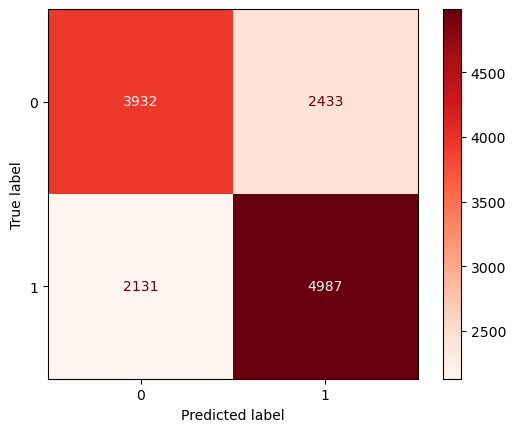

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Resetting plot style
plt.rcParams.update(plt.rcParamsDefault)

# Plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg1, X_val_min, y_val, cmap='Reds')
plt.show()

We see a slight imbalance between class 0 (below average mean CMQ score) and class 1 (above average) with respect to precision, recall and F1 scores, with the model performing better on class 1 than class 0. We might be able to address this by using the 'class_weight' parameter in the scikit-learn implementation of logistic regression. The 'balanced' setting is supposed to weight the classes in proportion to their frequency in the data.

Let's first see what the balance between classes looks like for our dataset, as well as the test, train and validation subsamples. 

In [81]:
# Checking balance between classes

print("Entire dataset:")
print("Class 1 %:", y.mean(), "\n")

print("Test set:")
print("Class 1 %:", y_test.mean(), "\n")

print("Remainder set:")
print("Class 1 %:", y_remainder.mean(), "\n")

print("Train set:")
print("Class 1 %:", y_train.mean(), "\n")

print("Validation set:")
print("Class 1 %:", y_val.mean(), "\n")

Entire dataset:
Class 1 %: 0.5279478780974082 

Test set:
Class 1 %: 0.5279772147392156 

Remainder set:
Class 1 %: 0.5279405438281586 

Train set:
Class 1 %: 0.5279446669633585 

Validation set:
Class 1 %: 0.5279240525105688 



Because we stratified the data using y during our splits, we are seeing very similar proportions of class 1 and class 0 in all of these sets. We see that about 53% of observations belong to class 1, meaning that our model could achieve an accuracy score of ~53% simply by predicting class 1 for every observation.

Let's try fitting a logistic regression model using the 'class_weight' parameter set to 'balanced'.

In [82]:
# Instantiating and fitting model
log_reg2 = LogisticRegression(class_weight='balanced', random_state=0)
log_reg2.fit(X_train_min, y_train)

# Scoring
print("Train score:", log_reg2.score(X_train_min, y_train))
print("Test score:", log_reg2.score(X_val_min, y_val))

Train score: 0.6664812342382436
Test score: 0.6589779722613661


In [83]:
# Looking at classification report
y_val_pred = log_reg2.predict(X_val_min)

print("=========================================================")
print("Model Evaluation and Confusion Matrix for Validation Data")
print("=========================================================\n")
print(classification_report(y_val, y_val_pred))

Model Evaluation and Confusion Matrix for Validation Data

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      6365
           1       0.68      0.66      0.67      7118

    accuracy                           0.66     13483
   macro avg       0.66      0.66      0.66     13483
weighted avg       0.66      0.66      0.66     13483



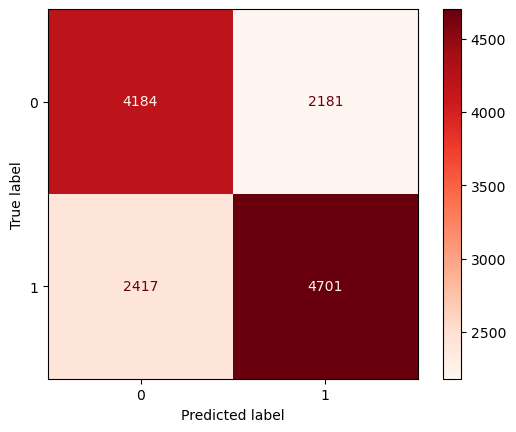

In [84]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg2, X_val_min, y_val, cmap='Reds')
plt.show()

Here we see a better balance between F1 scores across classes. However, we're seeing a slightly larger difference between precision scores across classes, despite the recall scores being closer. In the first version of the model, we saw more false positives than false negatives, while we are here seeing more false negatives than false positives (which indicates a better balance, given that there are more true positives than true negatives in the dataset).

Although the improvement is minor, we can continue to use this parameter setting in future iterations.

We'll now look at the C value for our logistic regression model. The C value controls strength of the regularization penalty (where the regularization penalty is determined by the 'penalty' parameter). This will preven the model coefficients from getting too large, which in theory should help prevent the model from overfitting. A smaller C value indicates a stronger regularization penalty. We will try a variety of C value settings, and then plot the resulting accuracy scores and F1 scores for both the train and validation sets.

In [85]:
# Setting up loop to test different C values
from sklearn.metrics import f1_score

train_accs = {}
train_f1s = {}

val_accs = {}
val_f1s = {}

Cs = [0.001, 0.01, 0.1, 1, 10]

for C in Cs:
    
    # Instantiate and fit model
    log_reg = LogisticRegression(class_weight='balanced',
                                 random_state=0,
                                 C=C)
    log_reg.fit(X_train_min, y_train)
    
    # Recording scores
    y_train_pred = log_reg.predict(X_train_min)
    y_val_pred = log_reg.predict(X_val_min)
    
    train_accs[C] = accuracy_score(y_train, y_train_pred)
    val_accs[C] = accuracy_score(y_val, y_val_pred)
    train_f1s[C] = f1_score(y_train, y_train_pred)
    val_f1s[C] = f1_score(y_val, y_val_pred)

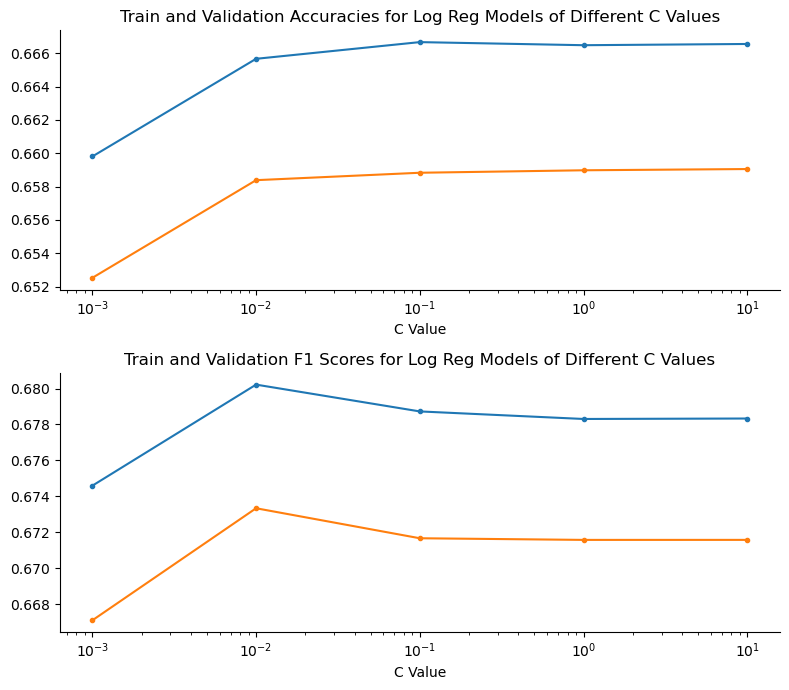

In [86]:
# Plotting
plt.subplots(2,1, figsize=(8,7))

plt.subplot(2,1,1)
plt.plot(train_accs.keys(), train_accs.values(), marker='.', label='Train Accuracy')
plt.plot(val_accs.keys(), val_accs.values(), marker='.', label='Validation Accuracy')
plt.xlabel('C Value')
plt.xscale('log')
plt.title('Train and Validation Accuracies for Log Reg Models of Different C Values')

plt.subplot(2,1,2)
plt.plot(train_f1s.keys(), train_f1s.values(), marker='.', label='Train F1 Score')
plt.plot(val_f1s.keys(), val_f1s.values(), marker='.', label='Validation F1 Score')
plt.xlabel('C Value')
plt.xscale('log')
plt.title('Train and Validation F1 Scores for Log Reg Models of Different C Values')

sns.despine()
plt.tight_layout()
plt.show()

We are not seeing overfitting for any of these C values, although the class 1 F1 score appears highest for a C value of 0.01.

We will now try using GridSearchCV to optimize our logistic regression model. We will attempt to fine tune the following parameters:

- **C**: parameter controlling the strength of the regularization penalty, where smaller values indicate a stronger penalty.
- **solver**: the algorithm used to optimize the model.
- **penalty**: the regularization penalty applied (either l1, l2, or none). 

Because certain solvers are incompatible with certain penalty settings, we will use multiple grid searches here to find the best combination of parameters.

In [87]:
# Ignoring warnings 
import warnings
warnings.filterwarnings("ignore")

In [88]:
# GridSearchCV with 'saga' solver

# Creating estimators and pipeline
estimators = [('scaler', RobustScaler()),
              ('model', LogisticRegression(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [LogisticRegression(random_state=0)],
             'model__C': [0.01, 0.1, 1, 10],
             'model__solver': ['saga'],
             'model__penalty': ['l1','l2','none']}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, error_score='raise')
fittedgrid = grid.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `p

/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [89]:
# Checking best parameters
fittedgrid.best_params_

{'model': LogisticRegression(C=0.1, random_state=0, solver='saga'),
 'model__C': 0.1,
 'model__penalty': 'l2',
 'model__solver': 'saga'}

In [90]:
# Checking best cross val score
fittedgrid.best_score_

0.6784500710719328

In [91]:
#GridSearchCV with 'lbfgs' solver

# Creating estimators and pipeline
estimators = [('scaler', RobustScaler()),
              ('model', LogisticRegression(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [LogisticRegression(random_state=0)],
             'model__C': [0.01, 0.1, 1, 10],
             'model__solver': ['lbfgs'],
             'model__penalty': ['l2','none']}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, error_score='raise')
fittedgrid = grid.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `p

/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elliotcarter/anaconda

In [92]:
# Checking best parameters
fittedgrid.best_params_

{'model': LogisticRegression(C=0.1, random_state=0),
 'model__C': 0.1,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs'}

In [93]:
# Checking best score
fittedgrid.best_score_

0.6784797391602361

In [94]:
# GridSearchCV with 'liblinear' solver

# Creating estimators and pipeline
estimators = [('scaler', RobustScaler()),
              ('model', LogisticRegression(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [LogisticRegression(random_state=0)],
             'model__C': [0.01, 0.1, 1, 10],
             'model__solver': ['liblinear'],
             'model__penalty': ['l1','l2']}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, error_score='raise')
fittedgrid = grid.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [95]:
# Checking best parameters
fittedgrid.best_params_

{'model': LogisticRegression(C=0.1, random_state=0, solver='liblinear'),
 'model__C': 0.1,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [96]:
# Checking best score
fittedgrid.best_score_

0.6784945748547543

Across the three grid searches, we do not see any significant variation in accuracy score, suggesting that the choice of solver and regularization penalty type is not affecting model performance. Going forward, we will use the following settings (although any of the best parameters found in the searches performed would be adequate):

- C: 0.1
- solver: liblinear
- penalty: l2

We'll now fit a model with these settings to our full remainder set, and then assess its performance on the test set.

First, we need to reduce our features, scale the data (fitting on the remainder and transforming the remainder and the test set).

In [97]:
# Reducing features again
X_remainder_min = X_remainder[['galtan',
                            'Edu_low',
                            'Age',
                            '2017_unemployment',
                            'Pol_Ori',
                            'Democracy_Score',
                            'Sex_male',
                            'Winner_state',
                            'Edu_high',
                            'Country_Spain',
                            'Country_Portugal',
                            'Country_Romania',
                            'Country_Hungary',
                            'Country_Netherlands']]

X_test_min = X_test[['galtan',
                'Edu_low',
                'Age',
                '2017_unemployment',
                'Pol_Ori',
                'Democracy_Score',
                'Sex_male',
                'Winner_state',
                'Edu_high',
                'Country_Spain',
                'Country_Portugal',
                'Country_Romania',
                'Country_Hungary',
                'Country_Netherlands']]

# Checking
print(X_remainder_min.shape)
print(X_test_min.shape)

(67411, 14)
(16853, 14)


In [98]:
# Scaling
rs = RobustScaler()
X_remainder_scaled = rs.fit_transform(X_remainder_min)
X_remainder_scaled = pd.DataFrame(X_remainder_scaled, columns=X_remainder_min.columns)
X_test_scaled = rs.transform(X_test_min)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_min.columns)

In [99]:
# Checking
print(X_remainder_scaled.shape)
print(X_test_scaled.shape)

(67411, 14)
(16853, 14)


In [100]:
# Fitting model
log_reg_final = LogisticRegression(C=0.1,
                                   solver='liblinear',
                                   penalty='l2',
                                   class_weight='balanced',
                                   random_state=0)
log_reg_final.fit(X_remainder_scaled, y_remainder)

LogisticRegression(C=0.1, class_weight='balanced', random_state=0,
                   solver='liblinear')

In [103]:
# Scoring model
print('Train score:', log_reg_final.score(X_remainder_scaled, y_remainder))
print('Test score:', log_reg_final.score(X_test_scaled, y_test))

Train score: 0.6649508240494875
Test score: 0.6581617516169228


We are seeing minimal overfitting but a slightly lower accuracy score than we saw in the cross validation results. We'll also check the classification report and the confusion matrix for the test data.

In [104]:
# Looking at classification report
y_test_pred = log_reg_final.predict(X_test_scaled)

print("=========================================================")
print("Model Evaluation and Confusion Matrix for Validation Data")
print("=========================================================\n")
print(classification_report(y_test, y_test_pred))

Model Evaluation and Confusion Matrix for Validation Data

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      7955
           1       0.68      0.66      0.67      8898

    accuracy                           0.66     16853
   macro avg       0.66      0.66      0.66     16853
weighted avg       0.66      0.66      0.66     16853



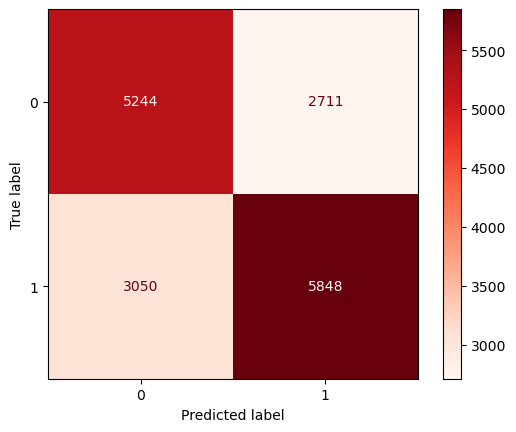

In [105]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg_final, X_test_scaled, y_test, cmap='Reds')
plt.show()

We are seeing a good balance of F1 scores across the classes but a somewhat large gap between precision scores for class 0 (0.63) and class 1 (0.68). We will see if we can improve these metrics with our next model, which will be a non-linear classifier.

The final thing we will check for our logistic regression model is the coefficients for the features.

In [106]:
# Getting the coefficients and matching to the features
features = X_remainder_scaled.columns
coefs = log_reg_final.coef_[0]

feature_coef = zip(features,coefs)
coef_dict = {}

for f,c in feature_coef:
    coef_dict[f] = c
    
coefs = pd.DataFrame(coef_dict, index=['Coef'])
coefs = coefs.T.sort_values(by='Coef', ascending=False)

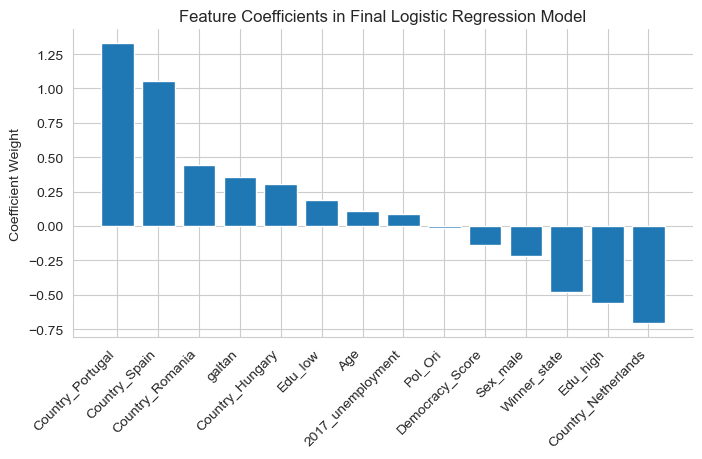

In [107]:
# Plotting
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.bar(coefs.index, coefs.Coef)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Coefficients in Final Logistic Regression Model')
plt.ylabel('Coefficient Weight')
sns.despine()
plt.show()

We see very similar coefficient weights to that of our final linear regression model: the model's predictions are largely determined by the country variables, and features like political orientation, whose relationship with the target is non-linear, are given relatively low weights.

<a id = '1.2.2'></a>
### 1.2.2 - Gradient Boosting Classifier

We'll now move on to our final supervised model, the Gradient Boosting classification model. This model works much like the Gradient Boosting regression model, especially in the case of binary classification where only one regression tree is created for each sub-model. Because we have already done some manual tuning of hyperparameters with the Gradient Boosting regressor we will move straight to GridSearchCV for the classifcation version. Since multicollinearity is less of an issue for non-linear models, we will use the full remainder set for X and y (including all features). We will include scaling in the GridSearchCV.

We will try modifying the following hyperparameters:

- **max_depth**
- **n_estimators**
- **learning_rate**

In [108]:
# Importing model
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
# GridSearchCV for Gradient Boosting Classification model

# Creating estimators and pipeline
estimators = [('scaler', RobustScaler()),
              ('model', GradientBoostingClassifier(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [GradientBoostingClassifier(random_state=0)],
             'model__max_depth': [1,3,5],
             'model__n_estimators': [100,150,200,500],
             'model__learning_rate': [0.075,0.1,0.15,0.2]}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
fittedgrid = grid.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [110]:
print("Best parameter settings:", fittedgrid.best_params_)
print("Best score:", fittedgrid.best_score_)

Best parameter settings: {'model': GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=0), 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Best score: 0.6947234053424541


Our best model achieved an accuracy score of about 0.69 with the following settings:
- max_depth: 5
- learning_rate: 0.15
- n_estimators: 100

This depth setting is at the high end of our search range, so we'll now try another GridSearchCV with some higher max_depth settings.

In [111]:
# GridSearchCV for Gradient Boosting Classification model with higher max_depth settings

# Creating estimators and pipeline
estimators = [('scaler', RobustScaler()),
              ('model', GradientBoostingClassifier(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [GradientBoostingClassifier(random_state=0)],
             'model__max_depth': [5,7,9],
             'model__n_estimators': [100,150,500],
             'model__learning_rate': [0.1,0.2]}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
fittedgrid = grid.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [112]:
print("Best parameter settings:", fittedgrid.best_params_)
print("Best score:", fittedgrid.best_score_)

Best parameter settings: {'model': GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=0), 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 150}
Best score: 0.6942190335381208


We do not see any improvement here by increasing the max_depth of the tree sub-models.

The final thing we will try is the XGBoost implementation of a gradient boosting model, which is supposed to be a more efficient version of the model and potentially more powerful because of the way it incorporates regularization features.

With the XGBoost classifier, we will experiment with the following hyperparameters:

- **max_depth**: the same as in the Gradient Boosting classifier/regressor
- **eta**: the 'shrinkage' parameter which prevents overfitting by reducing the weights of the features at each sub-model step.
- **n_estimators**: the same as in the other gradient boosting models

In [114]:
# Installing xgboost package
# pip install xgboost # Uncomment this line to pip install xgboost

SyntaxError: invalid syntax (2084263915.py, line 2)

In [116]:
# importing xgboost classifer
from xgboost import XGBClassifier

In [118]:
# GridSearchCV for xgboost classifer

# Creating estimators and pipeline
estimators = [('scaler', RobustScaler()),
              ('model', XGBClassifier(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [XGBClassifier(random_state=0)],
             'model__max_depth': [3,6,9],
             'model__eta': [0.1,0.3,0.5],
             'model__n_estimators': [100,200]}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
fittedgrid = grid.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [119]:
print("Best parameter settings:", fittedgrid.best_params_)
print("Best score:", fittedgrid.best_score_)

Best parameter settings: {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...), 'model__eta': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100}
Best score: 0.6946789224642749


The best score is roughly the same as the best Gradient Boosting classifier we trained. Here, we see the best results with the following settings:

- eta: 0.5
- max_depth: 3
- n_estimators: 200

Since this was the highest number of estimators we tried, let's quickly see if increasing to 500 estimators improves performance.

In [120]:
# GridSearchCV for xgboost classifer

# Creating estimators and pipeline
estimators = [('scaler', RobustScaler()),
              ('model', XGBClassifier(random_state=0))]

pipeline = Pipeline(estimators, memory=cachedir)

# Setting hyperparameter ranges for gridsearch
param_grid = [
            {'model': [XGBClassifier(random_state=0)],
             'model__max_depth': [3],
             'model__eta': [0.5],
             'model__n_estimators': [500]}
]

# Gridsearch and fitting
grid = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
fittedgrid = grid.fit(X_remainder, y_remainder)

print("Best parameter settings:", fittedgrid.best_params_)
print("Best score:", fittedgrid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter settings: {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...), 'model__eta': 0.5, 'model__max_depth': 3, 'model__n_estimators': 500}
Best score: 0.689130900831755


The performance on the validation folds doesn't seem to improve by increasing the number of estimators beyond 200. Let's now scale our full remainder set and then train our XGBoost classifier with these settings. We'll then look at the classification report and confusion matrix for this model.

In [121]:
# Scaling the remainder set, transforming remainder and test
rs = RobustScaler()
X_remainder_scaled = rs.fit_transform(X_remainder)
X_remainder_scaled = pd.DataFrame(X_remainder_scaled, columns=X_remainder.columns)
X_test_scaled = rs.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [122]:
# Fitting XGBoost classifier with best settings

xgbc_final = XGBClassifier(eta=0.5,
                               max_depth=3,
                               n_estimators=200)

xgbc_final.fit(X_remainder_scaled, y_remainder)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [123]:
# Classification report for final xgboost model
y_test_pred = xgbc_final.predict(X_test_scaled)

print("=========================================================")
print("Model Evaluation and Confusion Matrix for Validation Data")
print("=========================================================\n")
print(classification_report(y_test, y_test_pred))

Model Evaluation and Confusion Matrix for Validation Data

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      7955
           1       0.70      0.74      0.72      8898

    accuracy                           0.69     16853
   macro avg       0.69      0.69      0.69     16853
weighted avg       0.69      0.69      0.69     16853



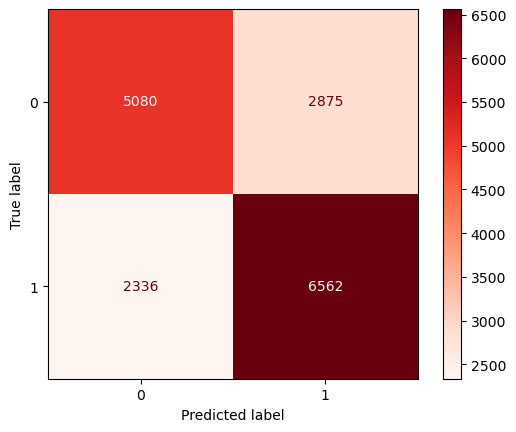

In [124]:
# Resetting plot style
plt.rcParams.update(plt.rcParamsDefault)

# Plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(xgbc_final, X_test_scaled, y_test, cmap='Reds')
plt.show()

Here, we see an accuracy score about .03 higher than that of our best logistic regression model. There is a slight imbalance in F1 score between classes (0.71 for class 1 versus 0.66 for class 0), which we can likely correct for by resampling our data to achieve a better class balance in the training set. We'll try this now.

In [125]:
from sklearn.utils import resample

data = np.column_stack((X_remainder_scaled, y_remainder))

# Separate the minority and majority classes
class_0 = data[data[:, -1] == 0]
class_1 = data[data[:, -1] == 1]

class_0_size = len(class_0)

# Resample and recombine data
class_1_resampled = resample(class_1, replace=True, n_samples=class_0_size, random_state=0)
resampled_data = np.vstack((class_0, class_1_resampled))

# Split into X and y
X_remainder_resampled = resampled_data[:, :-1]
y_remainder_resampled = resampled_data[:, -1]

In [126]:
# Checking
print(len(X_remainder_resampled))
print(len(y_remainder_resampled))

63644
63644


In [127]:
# Checking class balance
y_remainder_resampled.sum() / len(y_remainder_resampled)

0.5

In [128]:
# Retraining model
xgbc_final_balanced = XGBClassifier(eta=0.5,
                               max_depth=3,
                               n_estimators=200)

xgbc_final_balanced.fit(X_remainder_resampled, y_remainder_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [129]:
# Classification report for model trained on balanced data

y_test_pred = xgbc_final_balanced.predict(X_test_scaled)

print("=========================================================")
print("Model Evaluation and Confusion Matrix for Validation Data")
print("=========================================================\n")
print(classification_report(y_test, y_test_pred))

Model Evaluation and Confusion Matrix for Validation Data

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      7955
           1       0.70      0.69      0.70      8898

    accuracy                           0.68     16853
   macro avg       0.68      0.68      0.68     16853
weighted avg       0.68      0.68      0.68     16853



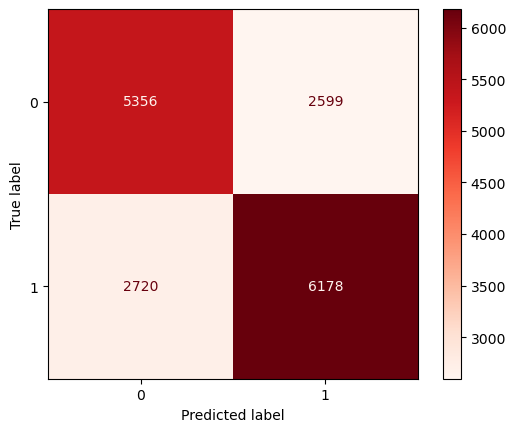

In [130]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(xgbc_final_balanced, X_test_scaled, y_test, cmap='Reds')
plt.show()

We see a slight improvement in the balance between classes with respect to recall and F1 score, but also a slightly larger gap in precision scores and a 0.01 decrease in overall accuracy.

We will continue to use the version of the model trained on the slightly imbalanced data here, trading off some of the balance between recall scores for an increase in accuracy and balance in precision.

Before moving on, let's look at the feature importances of this model.

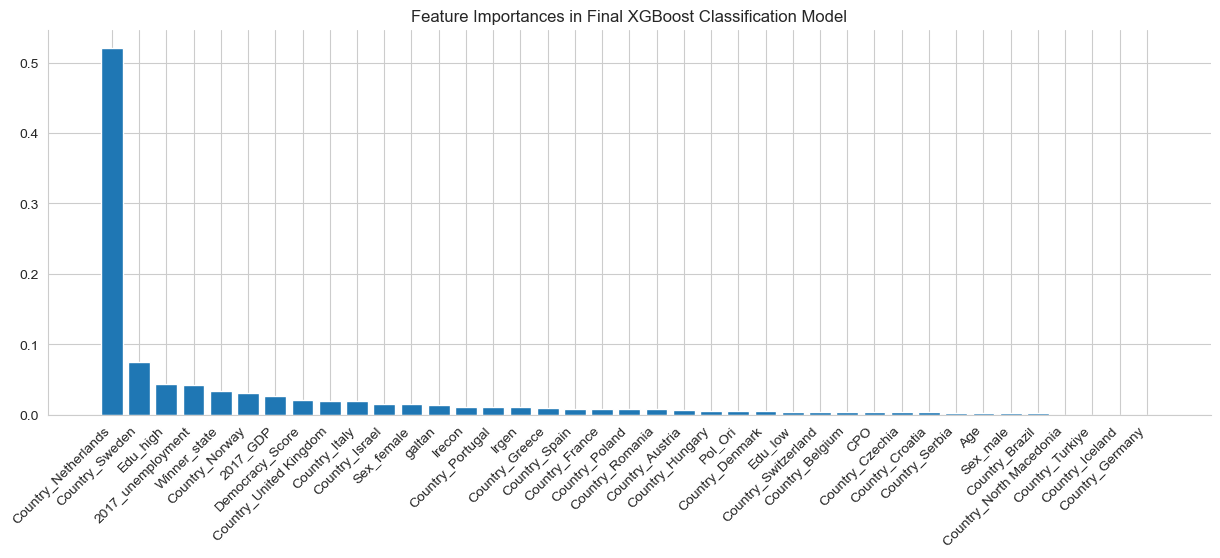

In [131]:
# Creating dataframe of feature importances in model
importances = pd.DataFrame(xgbc_final.feature_importances_, index=X_remainder.columns, columns=["feature_importance"])
importances = importances.sort_values(by="feature_importance", ascending=False)

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.bar(importances.index, importances.feature_importance)
plt.title('Feature Importances in Final XGBoost Classification Model')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

Here, we see lower feature importance scores for some of the individual-level variables compared to those of the Gradient Boosting regression model. But we see the same pattern with the Netherlands country-level variable as the most important feature, this time by an even wider margin.

We'll look more deeply into interpreting this model in the next section. But first, let's just see how our model would perform if we removed all of the country information.

In [132]:
# Creating individual level X for remainder and test

X_rem_individual = X_remainder_scaled[['galtan',
                                        'Edu_low',
                                        'Age',
                                        '2017_unemployment',
                                        '2017_GDP',
                                        'Pol_Ori',
                                        'Democracy_Score',
                                        'Sex_male',
                                        'Winner_state',
                                        'Edu_high',
                                        'lrecon',
                                        'lrgen']]

X_test_individaul = X_test_scaled[['galtan',
                                    'Edu_low',
                                    'Age',
                                    '2017_unemployment',
                                    '2017_GDP',
                                    'Pol_Ori',
                                    'Democracy_Score',
                                    'Sex_male',
                                    'Winner_state',
                                    'Edu_high',
                                    'lrecon',
                                    'lrgen']]

In [133]:
# Retraining model on just individual columns
xgbc_final_individual = XGBClassifier(eta=0.5,
                               max_depth=3,
                               n_estimators=200)

xgbc_final_individual.fit(X_remainder_individual, y_remainder)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [134]:
# Classification report for model trained on individual features

y_test_pred = xgbc_final_balanced.predict(X_test_scaled)

print("=========================================================")
print("Model Evaluation and Confusion Matrix for Validation Data")
print("=========================================================\n")
print(classification_report(y_test, y_test_pred))

Model Evaluation and Confusion Matrix for Validation Data

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      7955
           1       0.70      0.69      0.70      8898

    accuracy                           0.68     16853
   macro avg       0.68      0.68      0.68     16853
weighted avg       0.68      0.68      0.68     16853



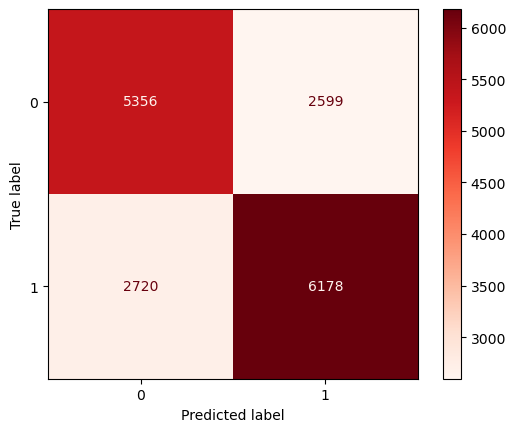

In [135]:
# Resetting plot style
plt.rcParams.update(plt.rcParamsDefault)

# Plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(xgbc_final_balanced, X_test_scaled, y_test, cmap='Reds')
plt.show()

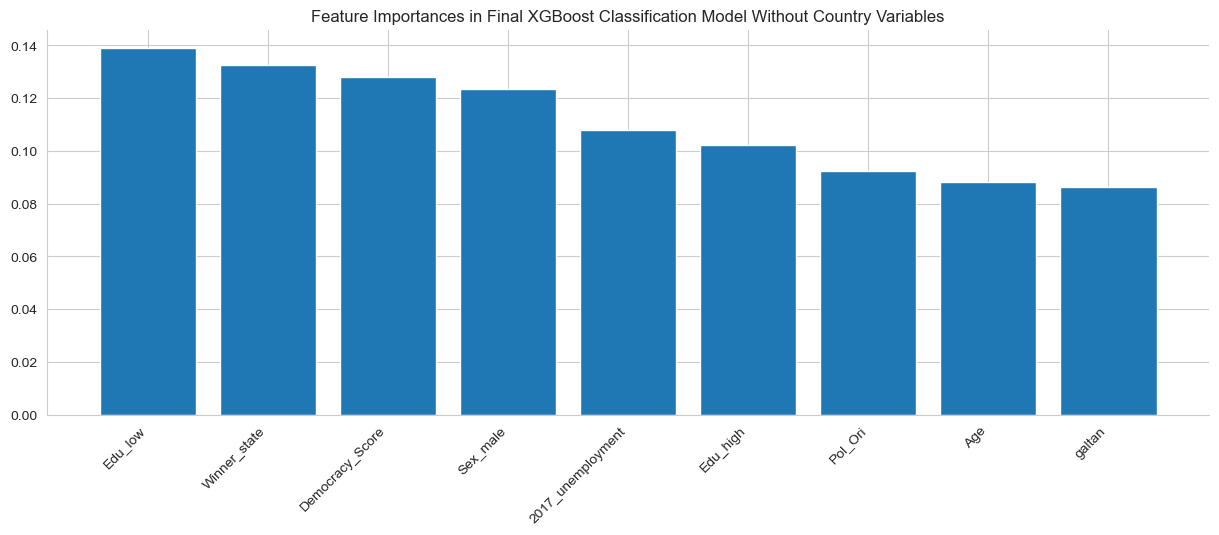

In [136]:
# Creating dataframe of feature importances in model
importances = pd.DataFrame(xgbc_final_individual.feature_importances_, index=X_remainder_individual.columns, columns=["feature_importance"])
importances = importances.sort_values(by="feature_importance", ascending=False)

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.bar(importances.index, importances.feature_importance)
plt.title('Feature Importances in Final XGBoost Classification Model Without Country Variables')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

Interestingly, our model's performance is practically the same after removing all country features from the data, with an overall accuracy 0.01 lower than our best model previously, and a better balance of F1 scores between classes. The ranking of the predictors in terms of feature importance has shifted; in the country-inclusive model, for example, `Edu_low` ranked quite low among predictors but it emerges as the most 'important' predictor here.

We will look further into interpreting this model in the next section.

## 2. Model Agnostic Interpretation

Our main goal in this project is to better understand the factors that correlate with conspiracy mentality. Therefore, we are more interested in model interpretation than in, for example, maximizing the model's accuracy. Our use of ensemble models thus makes sense only insofar as we can attempt to interpret them.

We've seen that we can look at the feature importances for our ensemble models. This is because we have been using tree-based ensemble models, and with such models it is always possible to look at a the way that a feature is used in the binary splits which partition the data within the individual trees. But relying on the feature importance metrics can be somewhat misleading, since they do not tell us whether a feature was really necessary for a model to achieve a given level of performance. To illustrate, we saw at the end of the previous section that the `Country_Netherlands` variable was far and away the top feature in terms of feature importance, but that its exclusion from the model resulted in barely any loss in accuracy or F1 scores.

To help understand our models, we will turn to certain model agnostic tools for interpretation: Shapley Values and LIME.

<a id = '2.1'></a>
### 2.1 Shapley Values

Shapley values (named for the economist Lloyd Shapley) are based on a game-theoretic method for measuring individual contributions in a cooperative game: they represent the difference each player makes to their team by averaging the performance of all coalitions involving that player (e.g., player A's Shapley value is determined by the average value of all lineups that include A). A similar approach can be used to estimate the contribution of features to a model's decisions, even for non-linear, hard-to-interpret ('black box') models. When our model makes a prediction about the target, we can think of the Shapley value for each feature as the difference made by the presence of that feature to the way that prediction deviates from the model's average prediction. Put another way, the Shapley value is the impact on prediction the feature has averaged across all feature combinations.

We will try to interpret the behaviour of our non-linear models using Shapley values. We'll focus on regression models, since differences in the regressor's output can be straightforwardly interpreted as differences in predicted conspiracy mentality score.

Because we used scaled data on our models previously and we would like to see how our features are affecting the models' predictions on the original scale, we will quickly fit a new version of our best regressor model here on an unscaled version of the data. We'll use just the individual features (i.e., no country variables) to begin with.

We will start by installing and importing SHAP (SHapley Additive exPlanations).

In [178]:
# Installing SHAP
# pip install shap # Uncomment this line to pip install SHAP

In [179]:
# Separating X and y
X = dummy_df.drop(columns=['CMQ_1','CMQ_2','CMQ_3','CMQ_4','CMQ_5','CM4x','CM5x','CMQ_above_avg','CMQ_high'])
y = dummy_df.CM5x

# Reducing X
X_min = X[['galtan',
            'Edu_low',
            'Age',
            '2017_unemployment',
            '2017_GDP',
            'Pol_Ori',
            'Democracy_Score',
            'Sex_male',
            'Winner_state',
            'Edu_high',
            'lrecon',
            'lrgen']]

In [180]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_min, y, test_size=0.2, random_state=0)

In [181]:
# Training model
gbr = GradientBoostingRegressor(max_depth=5,
                                n_estimators=120,
                                learning_rate=0.15,
                                random_state=0)
gbr.fit(X_train, y_train)

# Checking R^2 for remainder and test sets
print("Remainder R^2:", gbr.score(X_train, y_train))
print("Test R^2:", gbr.score(X_test, y_test))

Remainder R^2: 0.30280395541664995
Test R^2: 0.2758948119671508


We see very similar performance to that of the model trained on the scaled data. Let's now use Shapley values to interpret this model. We'll start by looking at the Shapley values for just a single data point.

In [182]:
import shap

# Fit tree-specific kernel for SHAP 
explainer = shap.TreeExplainer(gbr)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_train)

In [183]:
# Initiate Javascript for visualization 
shap.initjs()

# Plot SHAP values for row 0 
shap.force_plot(explainer.expected_value,       
                shap_values[0],                 
                features=X_train.iloc[0],       
                feature_names=X_train.columns) 

This is a view of how our model predicted a single data point. The size of the bars and direction of the arrows show how that feature value contributed to the model's deviation from the average prediction (of 5.781). Here are some notes on the effects we see:

- The 2017 unemployment rate of the respondent's country of 7.1% (below the average for individuals in the dataset of about 7.4%, and below the average among the countries represented, about 9%) caused the model to predict a higher conspiracy mentality score. This is somewhat surprising, since in general we've seen that unemployment rate seems to positively correlate with conspiracy mentality.
- The respondent has a college degree, which caused the model to decrease its prediction. This fits with our prior expectations, given that we've observed a negative correlation between university education and conspiracy mentality.
- The respondent has a somewhat surprising mix of values on the political spectrum variables: they self-categorize as conservative in political orientation (`Pol_Ori` of 8) but they are categorized as being in the centre of the social political spectrum (`galtan` of 5) and slightly to the left of centre on the economic and general left-right scales (`lrecon` of 4.2 and `lrgen` of 4.4). However, all of these except their `lrgen` score are causing the model to predict a higher conspiracy mentality score.

Let's see the force plot for another data point to compare.

In [184]:
# Plot SHAP values for row 97
shap.force_plot(explainer.expected_value,       
                shap_values[97],                 
                features=X_train.iloc[97],       
                feature_names=X_train.columns)

Here, we see an example of a data point where the model predicts a high conspiracy mentality score (7.69 out of 10). The most influential values here are the low democracy score of the country, the high unemployment rate, the absence of a university degree, but also the location on the left pole of the political spectrum.

Let's see a force plot for a data point predicted as low in conspiracy mentality.

In [185]:
# Plot SHAP values for row 300 
shap.force_plot(explainer.expected_value,       
                shap_values[300],                 
                features=X_train.iloc[300],       
                feature_names=X_train.columns) 

Here, we see the model predicting a low conspiracy mentality score (3.7) due to a combination of low unemployment rate in the country, a centre-left political orientation, the presence of a university degree, and a country-level GDP around the median value in the dataset.

We can also get a 'global' view of how the feature values are affecting our model's predictions with Shapley values, using a 'summary plot.'

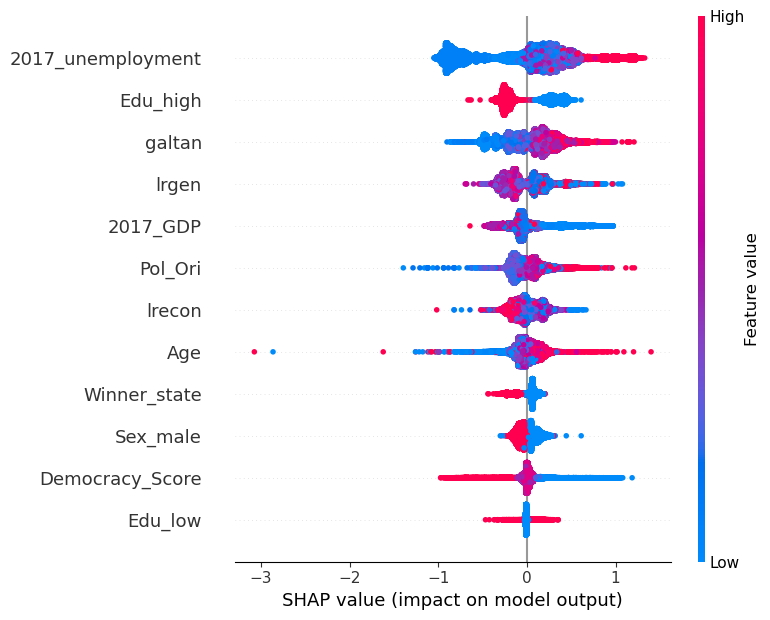

In [186]:
# Resetting plot style
plt.rcParams.update(plt.rcParamsDefault)

# Global interpretation - summary plot - type = 'dot'
shap.initjs()

plt.figure(figsize=(8,10))
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

We see that for some features, when their value is high, their inclusion in the model almost always impacts the model's prediction in one way, and when the value is low, their inclusion almost always impacts it in the other way. For example, higher education seems to just about always cause the model to predict a lower conspiracy mentality score, and supporting the political party in power just about always causes the model to predict a lower score. Sex also has a fairly predictable effect on the model's predictions, although the effect is smaller (the model predicts that males have lower conspiracy mentality scores than the average, but only by a small amount compared to other effects). Interestingly, low unemployment rates seem to cause lower predictions in many cases, but there is a large cluster of cases where the observation has a low unemployment score but because of feature interactions, the model predicts a slightly higher conspiracy mentality score on average.

For other features, we see some relatively large but also unpredictable effects on the model's predictions. Age sometimes has a big effect on the model's predictions (although the largest cluster of cases are ones where age doesn't have a big effect), and in general, higher ages seem to cause the model to predict higher conspiracy mentality, but we can see some exceptions as well. The political spectrum features also have notable but not cleanly predictable effects on the model's outputs, with general patterns of boosted predicted conspiracy mentality scores for data points further to the right, but with plenty of visible exceptions.

We can also look at feature importance scores from our Shapley values.

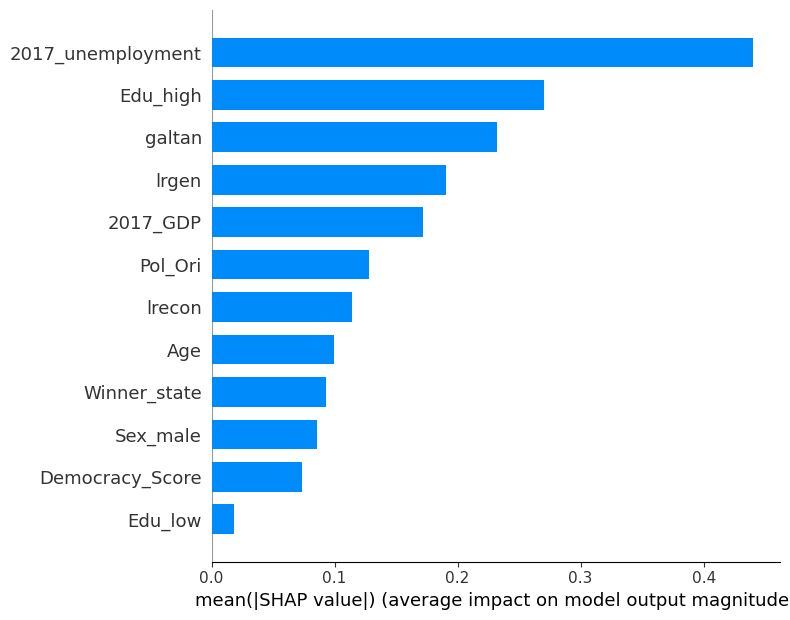

In [187]:
# Plotting feature importances from Shapley Values
plt.figure(figsize=(5,10))
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')
plt.show()

For reference, let's compare these feature importance scores to those that come directly from our model (i.e., the feature importances based on the presence of the features within the sub-model trees).

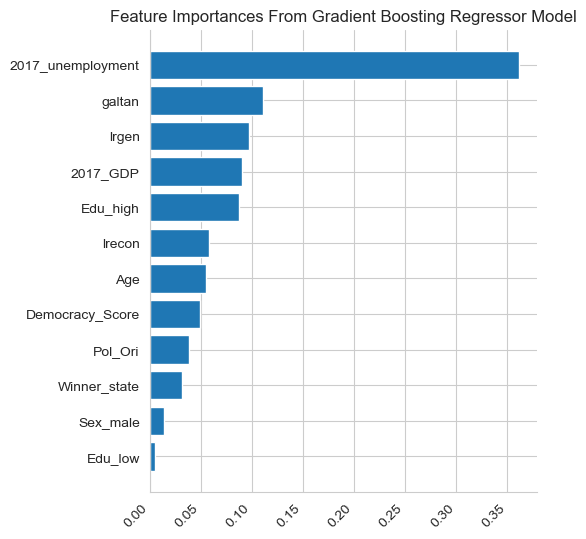

In [188]:
# Creating dataframe of feature importances in model
importances = pd.DataFrame(gbr.feature_importances_, index=X_train.columns, columns=["feature_importance"])
importances = importances.sort_values(by="feature_importance")

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(5,6))
plt.barh(importances.index, importances.feature_importance)
plt.title('Feature Importances From Gradient Boosting Regressor Model')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

We can see larger effects from certain features when we look at the feature importances based on Shapley values: e.g., political orientation and higher education.

Finally, we can look at a set of dependence plots, which will allow us to visually compare the Shapley values for a given feature with the specific values of that feature in the data.

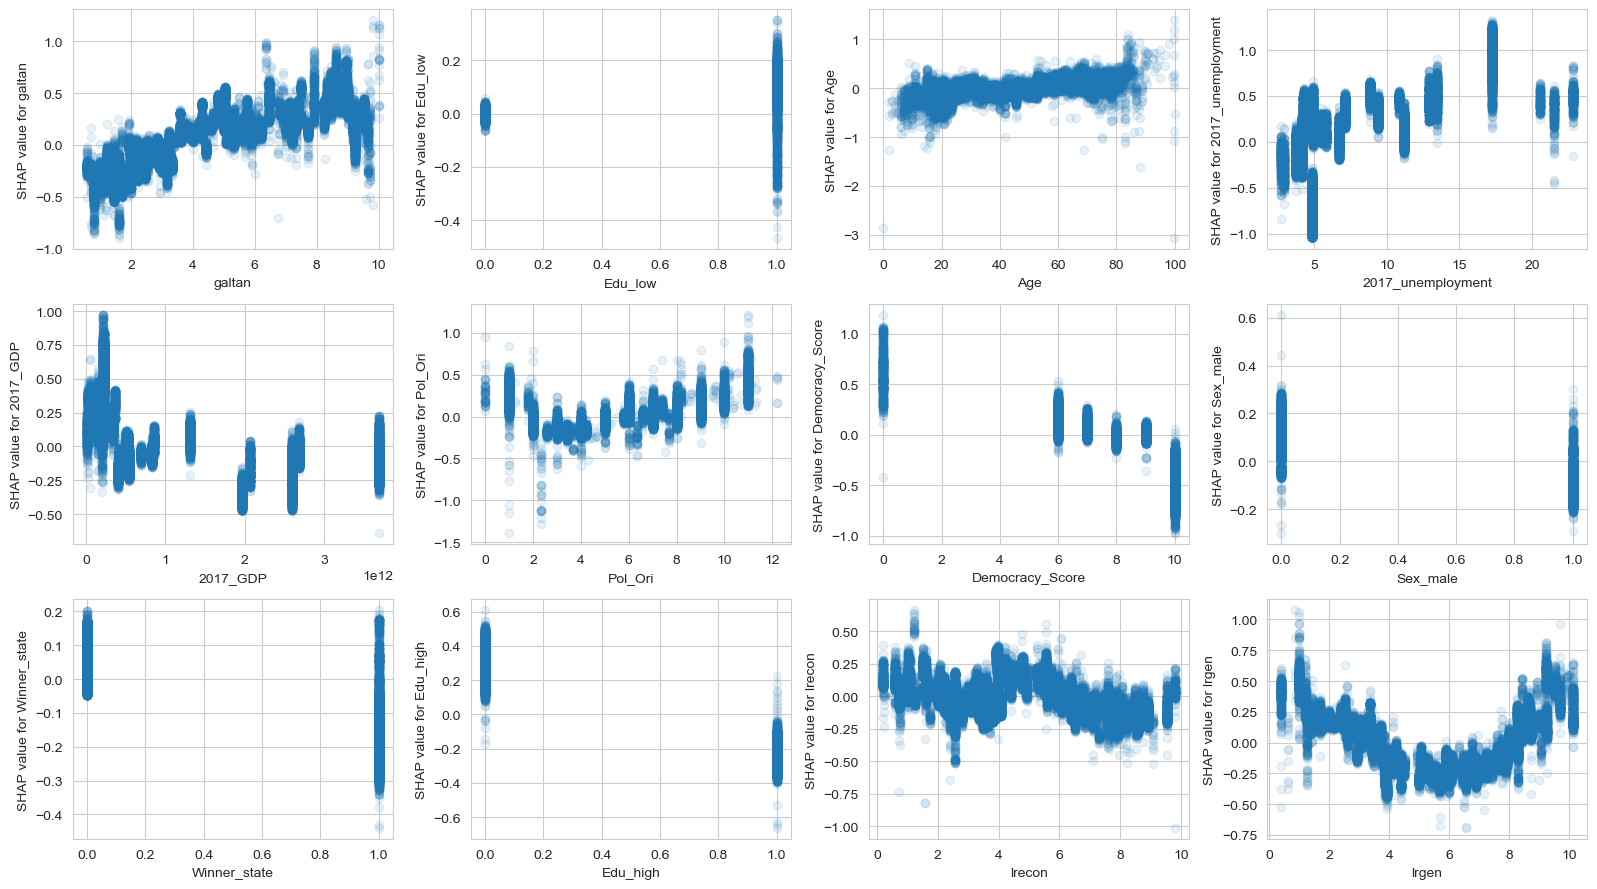

In [189]:
# Create DataFrame for Shapley values easier plotting
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

# Plot SHAP Dependence Plots for each feature
plt.subplots(3,4, figsize=(16,9))

for i, col in enumerate(shap_df.columns):
  plt.subplot(3,4,i+1)
  plt.scatter(X_train[col], shap_df[col], alpha=0.1)
  plt.xlabel(col)
  plt.ylabel(f'SHAP value for {col}')

plt.tight_layout()
plt.show()

We see some clear linear relationships between feature values and Shapley values: for instance, with `galtan` and `Edu_high`. But in other cases we see non-linear relationships. We can see some visual evidence of quadratic relationships with `lrgen` and `Pol_Ori`, and other features including `2017_unemployment` seem to interact with other features to determine a prediction (and thus it's hard to discern a pattern in the plot).

Why do `2017_unemployment` and `2017_GDP` have such large, non-linear effects on the model? One possibility is that they are acting as proxies for country information, and it is really the respondent's country that is driving the model's predictions. Because each country in the dataset has a unique combination of unemployment rate and GDP, it's possible for the model to discern a pattern based on the respondent's country even if country information is absent and even if there's no causal connection between unemployment rates, GDP, and conspiracy mentality. (But note that when we looked at the Shapley values for the first data point, we saw unemployment rate and GDP having *opposite* effects on the model's prediction, suggesting that these features are at least not *always* serving together as a single proxy for country information).

It is likely impossible to clearly identify a causal relationship between these factors given our present dataset. But it would nonetheless be interesting to compare these results with a model that excludes all country-level information (not just the explicit country variables). Let's train another version of the model on just the features that vary between individuals in the dataset and which cannot be used to discern country information, implicitly or explicitly.

In [190]:
X_train_2 = X_train[['galtan',
                    'Edu_low',
                    'Age',
                    'Pol_Ori',
                    'Sex_male',
                    'Winner_state',
                    'Edu_high',
                    'lrecon',
                    'lrgen']]

X_test_2 = X_test[['galtan',
                    'Edu_low',
                    'Age',
                    'Pol_Ori',
                    'Sex_male',
                    'Winner_state',
                    'Edu_high',
                    'lrecon',
                    'lrgen']]

In [191]:
# Training model
gbr_2 = GradientBoostingRegressor(max_depth=5,
                                n_estimators=120,
                                learning_rate=0.15,
                                random_state=0)
gbr_2.fit(X_train_2, y_train)

# Checking R^2 for remainder and test sets
print("Remainder R^2:", gbr_2.score(X_train_2, y_train))
print("Test R^2:", gbr_2.score(X_test_2, y_test))

Remainder R^2: 0.28181120243741575
Test R^2: 0.25259864510399366


As expected, the $R^2$ score for this version of the model is somewhat lower than for the previous version that included `2017_unemployment`, `2017_GDP`, and `Democracy_Score`, although only by ~0.02. Let's see the 'global' picture of the Shapley values for this version of the model with the summary plot and feature importances.

In [192]:
# Fit tree-specific kernel for SHAP 
explainer = shap.TreeExplainer(gbr_2)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_train_2)

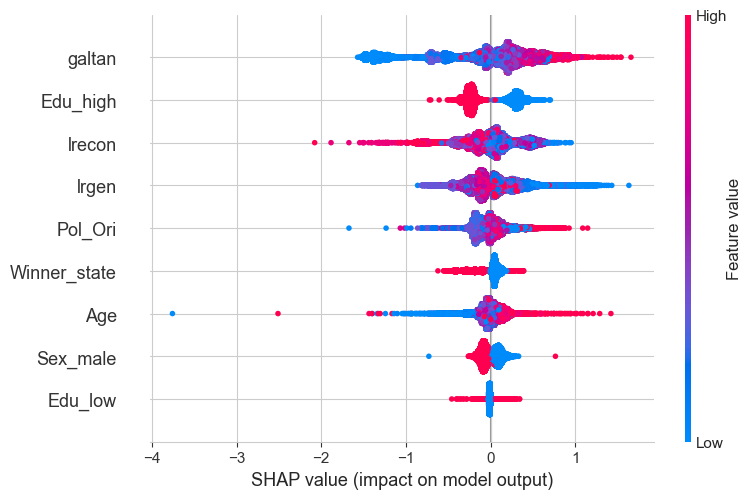

In [193]:
# Plotting global view of Shapley values
plt.figure(figsize=(8,10))
shap.summary_plot(shap_values, features=X_train_2, feature_names=X_train_2.columns)

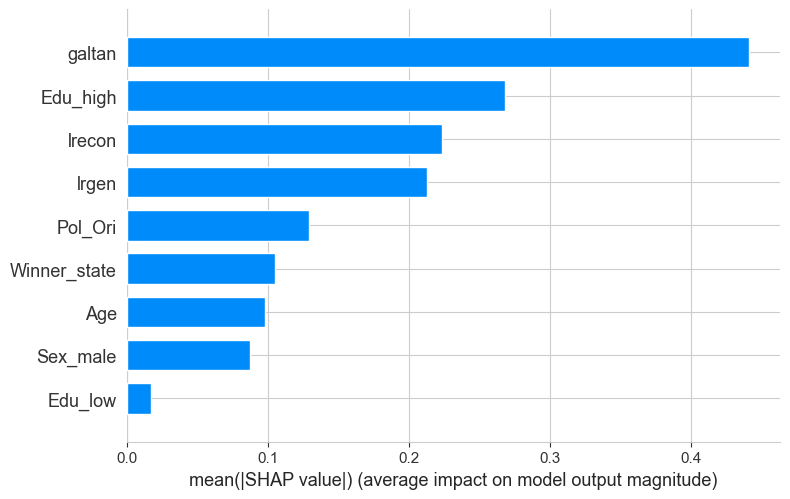

In [194]:
# Plotting feature importances from Shapley Values
plt.figure(figsize=(5,10))
shap.summary_plot(shap_values, features=X_train_2, feature_names=X_train_2.columns, plot_type='bar')
plt.show()

We can see some large and obvious differences in how the model responds to these features when unemployment rate, GDP, and democracy score are absent. For example, `galtan`, `Edu_high`, and `Winner_state` have more obviously non-linear effects on predictions in this iteration. And `galtan` and `Edu_high` emerge as the most important predictors here.

For a final comparison, it could be interesting to see the Shapley values for a version of the model that includes all predictors, including country variables. Let's train another version of the model and look at the summary plots.

In [195]:
# Train-test split for full feature set
X_train_3, X_test_3, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [196]:
# Training model
gbr_3 = GradientBoostingRegressor(max_depth=5,
                                n_estimators=120,
                                learning_rate=0.15,
                                random_state=0)
gbr_3.fit(X_train_3, y_train)

# Checking R^2 for train and test sets
print("Remainder R^2:", gbr_3.score(X_train_3, y_train))
print("Test R^2:", gbr_3.score(X_test_3, y_test))

Remainder R^2: 0.3045926310207605
Test R^2: 0.2755174899734427


In [197]:
# Fit tree-specific kernel for SHAP 
explainer = shap.TreeExplainer(gbr_3)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_train_3)

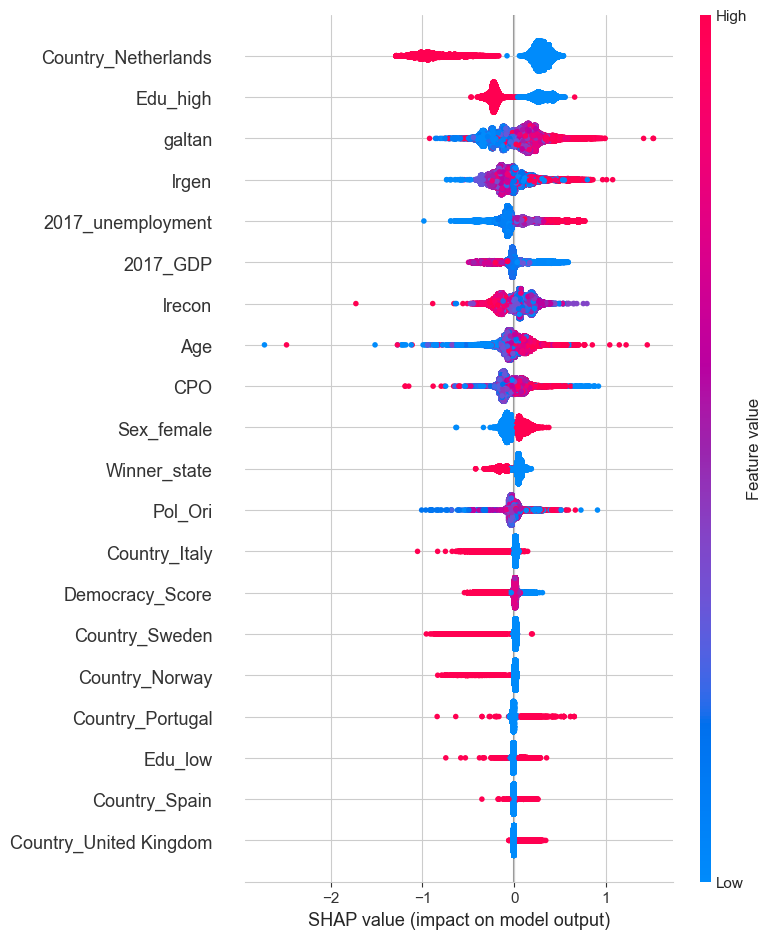

In [198]:
# Plotting global view of Shapley values
plt.figure(figsize=(8,10))
shap.summary_plot(shap_values, features=X_train_3, feature_names=X_train_3.columns)

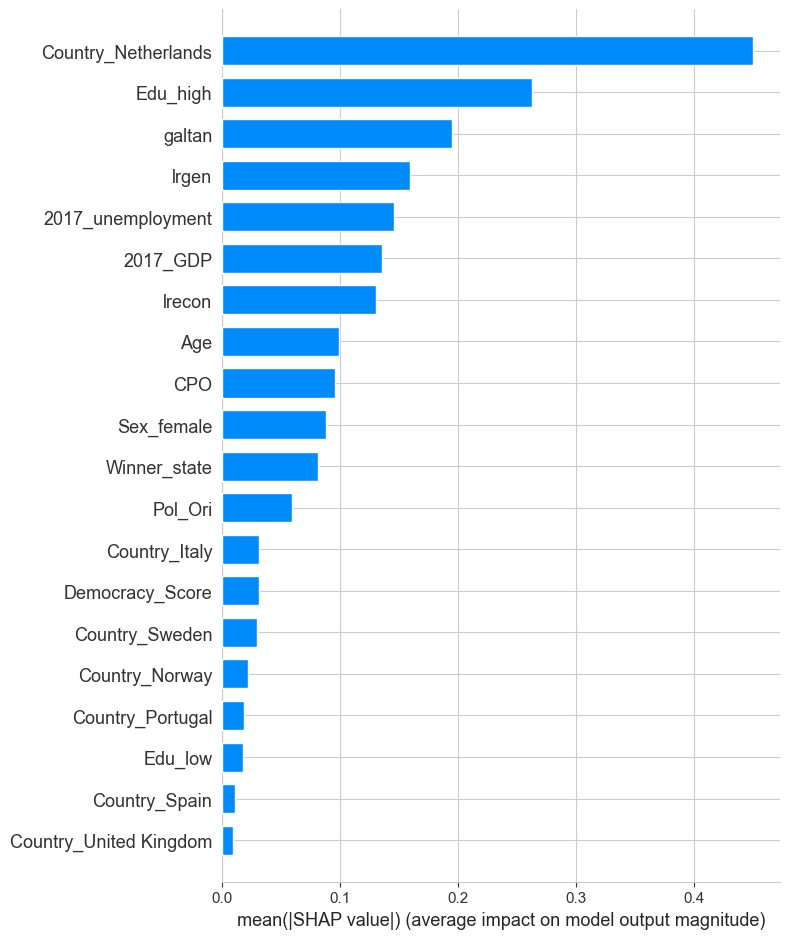

In [199]:
# Plotting feature importances from Shapley Values
plt.figure(figsize=(5,10))
shap.summary_plot(shap_values, features=X_train_3, feature_names=X_train_3.columns, plot_type='bar')
plt.show()

Regarding the idea that `2017_unemployment` and `2017_GDP` were acting merely as proxies for country information, we can note that these variables still have relatively high Shapely feature importances even when all country variables are included.

Again, we see here `Country_Netherlands` having the highest feature importance in the model despite being the only country variable in the top 10 (although the margin between it and the runner-up is smaller than when we looked at the feature importances from the Gradient Boosting regressor directly). Some of the countries with the highest average conspiracy mentality scores (e.g., Spain and Portugal) have only modest effects on the model's predictions, and the direction of the effect can depend on other features.

<a id = '2.2'></a>
### 2.2 - LIME

LIME is an acronym for 'local interpretable model-agnostic explanations.' The key word to understanding how LIME works is 'local.' The strategy LIME uses to explain difficult-to-interpret ('black box') models is to create a 'new' dataset consisting of a set of data points drawn from normal distributions with the same means and standard deviations as the original features. Then, it uses the model to make predictions for these new data points. When we want to understand the model's prediction for a given data point, LIME will fit a simple linear model to the 'new' dataset that prioritizes the 'local' data points--i.e., the points close to our point of interest are weighted much more heavily. To illustrate, if we think about a classification problem, a 'black box' model might draw a highly non-linear decision boundary which cannot be reasonably approximated by any linear model. But the insight behind LIME is that the decision boundary is still likely to be *locally* linear, such that if we focus on a specific region in the space of features, we can find a good linear approximation and then interpret the weights of that linear model to understand the original model's decision with respect to the given data point.

We'll use LIME to look at a few data points of interest from our Gradient Boosting regression model.

In [200]:
# Installing LIME
# pip install lime # Uncomment this line to pip install LIME

In [201]:
# Importing
import lime 
import lime.lime_tabular 

In [202]:
# Explainer model with LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    mode='regression',
    class_names=['CM5x'],
    feature_names=X_train.columns,
    random_state=88,
    )

# Explaining observation using local model
i = 0                                                                     
explanation = explainer.explain_instance(X_train.values[i],               
                                         gbr.predict
                                        )

# Show prediction and explanation 
explanation.show_in_notebook(show_table=True)

This plot shows us the original model's prediction within the range of predictions on the left side, and the feature values for the data point of interest on the right side. In the middle, it shows the weights of the locally weighted linear regression model, which we can use to understand the original model's decision for this data point.

We see that the biggest positive effect on the model's prediction (relative to this part of the feature space) is the `Pol_Ori` value above 7, and the greatest negative effect is the `Edu_high` value of 1. This perspective is different than what we saw when we looked at the Shaplely values for this data point, where the `2017_unemployment` value was found to be heavily responsible for the model's decision.

Let's look at the other two data points for which we previously created Shapley force plots.

In [203]:
i = 97                                                                     
explanation = explainer.explain_instance(X_train.values[i],               
                                         gbr.predict
                                        )

# Show prediction and explanation 
explanation.show_in_notebook(show_table=True)

For this region of the space of features, the most important determinants of this prediction according to LIME are the high unemployment rate, the absence of higher education, and the relatively far left `lrgen` score. 

In [204]:
i = 300                                                                     
explanation = explainer.explain_instance(X_train.values[i],               
                                         gbr.predict
                                        )

# Show prediction and explanation 
explanation.show_in_notebook(show_table=True)

For this part of the feature space, LIME tells us that the most important determinants of this low conspiracy mentality prediction are the respondent's higher education status, the unemployment rate falling below some threshold, and the centre-left political orientation (but the respondent not supporting the party in power and not being male pull the model's prediction slightly in the other direction).

## Part 3 - Conclusions

The following table summarizes the results of our modelling and hyperparameter optimization (unless stated otherwise, all scores are for the unseen test data).

| **Model**                   | **Best Parameters**                                              | **Scoring**                                                                            | **Notes**                                                                                                                                                                                                                                                                                                                                                                                                         |
|:-----------------------------|:------------------------------------------------------------------|:----------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Linear Regression           |                                                                  | $R^2$: 0.19                                                                            | <ul><li>This model uses just the non-country variables (except those with issues of multi-collinearity or high p-values in the model) and the top 5 country variables (ranked by correlations with target).</li> <li>Some evidence of non-normality in distribution of residuals (from Shapiro-Wilk test and QQ-plot) and heteroscedasticity (from plot of model residuals vs predicted values).</li><li>A version of the model where the training data excluded all country features resulted in an $R^2$ of just 0.13 on the training data.</li></ul> |
| Gradient Boosting Regressor | max_depth=5, n_estimators=120, learning_rate=0.15                | $R^2$: 0.27                                                                            | <ul><li>Originally, this $R^2$ was for the version of the model trained on all predictors.</li> <li>Achieved the same $R^2$ for a model where the training data excluded all country variables.</li> <li>Achieved $R^2$ of 0.25 excluding all country variables *and* country-level features (e.g., unemployment rate).</li></ul>                                                                                 |
| Logistic Regression         | C=0.1, solver='liblinear', penalty='l2', class_weight='balanced' | Accuracy: 0.66 <br> F1 Score (Class 1): 0.67 <br> F1 Score (Class 2): 0.65 | <ul><li>Uses the same features as the linear regression model: i.e., all of the non-country variables (except those with issues of multi-collinearity or high p-values in the model) and the top 5 country variables (ranked by correlations with target).</li> <li>Used 'balanced' setting for 'class_weight' parameter to achieve better balance of F1 scores.</li></ul>                                        |
| XGBoost Classifier          | eta=0.5, max_depth=3, n_estimators=200                           | Accuracy: 0.69 <br> F1 Score (Class 1): 0.72 <br> F1 Score (Class 2): 0.66 | <ul><li>Tried resampling to improve balance in F1 scores but the improvement was minimal and accuracy was reduced.</li> <li>These scores are for the version of the model trained on all features. A version where all country variables were excluded from training achieved similar performance (Accuracy: 68, F1 (class 1): 70, F1 (class 2): 67).</li></ul>                                                   |

Some conclusions we can draw from the modelling optimization process:

* With this dataset, using non-linear models it is possible to explain a bit more than a quarter of the variance in average conspiracy mentality scores using our other features (even excluding all country information). This means that we can get moderately good predictions of deviations from average conspiracy mentality scores using only a small set of predictors (basic demographic information, some country-level information such as unemployment rate and GDP, and measures of political orientation).
* If we are trying to predict who will be higher than average in conspiracy mentality, we can construct a non-linear model that correctly classifies about 70% of cases (using the same predictors mentioned above).
* Linear models perform somewhat worse on the dataset, especially when all country variables are excluded (removing the country variables from the linear regression model's training data resulted in a decrease in $R^2$ of about a third). This makes sense, since we know that many of the strongest linear relationships with the target variable involve the country features. But with non-linear models, it's possible to achieve similar or even equally good results *without* the country variables, suggesting that there are strong non-linear relationships between various individual features and the target.

Finally, here are some conclusions we can draw from our exploration of model agnostic interpretation methods:

* For non-linear models, the country features are mostly not large determinants of the model's predictions, with the exception of the Netherlands, which is the most important feature (by Shapely values) when included in the model. The Netherlands has the lowest average conspiracy mentality score of all countries in the datset, and it's possible that this low score cannot be predicted by any of the individual features included therein. It would be an interesting avenue for future research to see whether this result can be replicated, and to investigate why the Netherlands seems to have such a low conspiracy mentality score on average (that is, why Dutch people seem to be, on average, more trusting of authority and institutions than other Europeans).
* In the non-linear models, the measures of political orientation seem to have non-linear effects on predictions, with values closer to the political poles causing higher predictions of conspiracy mentality and values closer to the political centre (especially the centre-left) causing lower predictions. The exception is `galtan`, which measures the respondent's support for parties classified as *socially* left or right. This variable seems to have a linear effect on conspiracy mentality predictions across almost all models, with scores further to the right causing higher predictions in conspiracy mentality.